# «Метанпромбанк»: анализ оттока клиентов

**Основная задача:** анализ оттока клиентов. Необходимо провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком. Анализ покажет, какие клиенты уходят из банка, а так же поможет нам составить сегменты клиентов, которые склонны уходить из банка. Также необходимо сформулировать и проверить статистические гипотезы.

**Описание датасета:** Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Описание полей:**
- `USERID` — идентификатор пользователя
- `score` — баллы кредитного скоринга
- `city` — город
- `gender` — пол
- `age` — возраст
- `equity` — количество баллов собственности
- `balance` — баланс на счёте
- `products` — количество продуктов, которыми пользуется клиент
- `credit_card` — есть ли кредитная карта
- `last_activity` — активный клиент
- `EST_SALARY` — оценочный доход клиента
- `сhurn` — признак оттока

## План работы:
### Шаг 1. Загрузка и предобработка данных. 

1) **Загружаем датасет из облака `google` для универсального доступа** <br> <br>
2) **Изучаем общую информацию о датасете:**
    - выводим размер
    - приводим поля к необходимому типу данных
    - приводим названия полей к змеиному регистру <br> <br>
3) **Работа с пропусками**
    - Изучаем характер и количество пропусков, на основании этого принимаем решение об удалении/замене пустых значений
    - В случае принятия решения о замене пропусков на медианные/средние/соседние значения необходимо избавиться от артефактов (значения, которые не отражают действительность и появились по какой-то ошибке)
    - описать возможные причины появления пропусков <br> <br>
4) **Обработка дубликатов**
    - поиск и обработка явных дубликатов
    - поиск и обработка неявных дубликатов
    - описать возможные причины появления дубликатов <br> <br>
    
### Шаг 2. Исследовательский анализ.
1) **Отобразим (в том числе графически) сводные таблицы по следующим полям:**
    - `city`
    - `gender`
    - `equity`
    - `products`
    - `credit_card`
    - `last_activity`
    
    *в сводных таблицах будут: `уникальные значения по полям`, `количество клиентов`, `доля отточных клиентов`*<br> <br>
2) **Отобразим (в том числе графически) распределение значений в полях с непрерывными значениями:**
    - `age`
    - `score`
    - `balance`
    - `est_salary`
    
    В том числе в разрезе отточных клиентов. Сделаем 2 гистограммы на одном плоте. <br> <br>

3) **Для клиентов в оттоке и нет - найти средние, медианные: максимальные и минимальные значения по столбцам и отобразить разницу в процентах:**
    - `age`
    - `score`
    - `balance`
    - `est_salary` <br> <br>

4) **Проведем корреляционный анализ:**
    - Для проведения анализа необходимо преобразовать значения в категориальных полях к бинарному формату, для этого применим метод `one-hot encoding`.
    - Построим таблицу и визуализируем с помощью `heatmap`.
    
   
### Шаг 3. Проверка гипотез.
Сформулировать минимум 2 гипотезы с пояснением формулировки нулевой и альтернативной гипотезы и выбора критерия для проверки. Выбрать уровень статистической значимости.

### Шаг 4. Промежуточный вывод на основе исследования.
Интерпретировать результат исследования, вывести стратегически важные показатели и промежутки, которые корренным образом влияют на отток клиентов.

### Шаг 5. Провести сегментацию клиентов.
1) **Вручую вывести компактные сегменты клиентов и приотизировать их.**
2) **Вывести размер сегментов и уровень оттока по ним**. 

### Шаг 6. Написать общий вывод и рекомендации для бизнеса.
    
    

## Загрузка и предобработка данных.

### Необходимые библиотеки и функции

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
#загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

#дополнительные параметры
warnings.filterwarnings('ignore') #отключение предупреждений
pd.options.display.max_columns = 40 #отображение всех столбцов

#снимаем ограничения на отображение
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', '{:.2f}'.format)

#здесь будем хранить необходимые функции
def dataframe_from_gs(users_go_link): #функция формирует ссылку на CSV файл на гугл диске
    url='https://docs.google.com/spreadsheets/d/{}/export?&format=csv'.format(users_go_link)
    data = pd.read_csv(url)
    return data

def percent_difference(num1, num2): #разница в процентах между числами
    average = (num1 + num2) / 2
    difference = abs(num1 - num2)
    percent_diff = (difference / average) * 100
    return percent_diff



### Загрузка и общая информация о датасете

In [3]:
#подгружаем данные с облака 
data=dataframe_from_gs('1cQO2n_wH5UsMUgGYD73Foxwy4P4wxJtSMySidmjN1Jg')
#запоминаем изначальный размер, чтобы сравнить после предобработки данных
row_shape=data.shape 
print(f'В данном датасете {row_shape[0]} строк и {row_shape[1]} столбцов')

В данном датасете 10000 строк и 12 столбцов


In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


### Форматирование названий полей

In [5]:
#приводим название столбцов к нижнему и змеиному регистру
data.columns = data.columns.str.lower()
#переименуем столбец `userid` (приведем к змеиному регистру)
data.rename(columns={'userid':'user_id'},inplace=True)
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Работа с пропусками

In [6]:
#проверим столбцы на пропуски
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.260000
equity,0.000000
balance,22.950000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [7]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

В поле `age` 0,26% (26 строк) пропусков, это незначительное количество, поэтому удаляем строки.

In [8]:
data_f=data.dropna(subset=['age'])

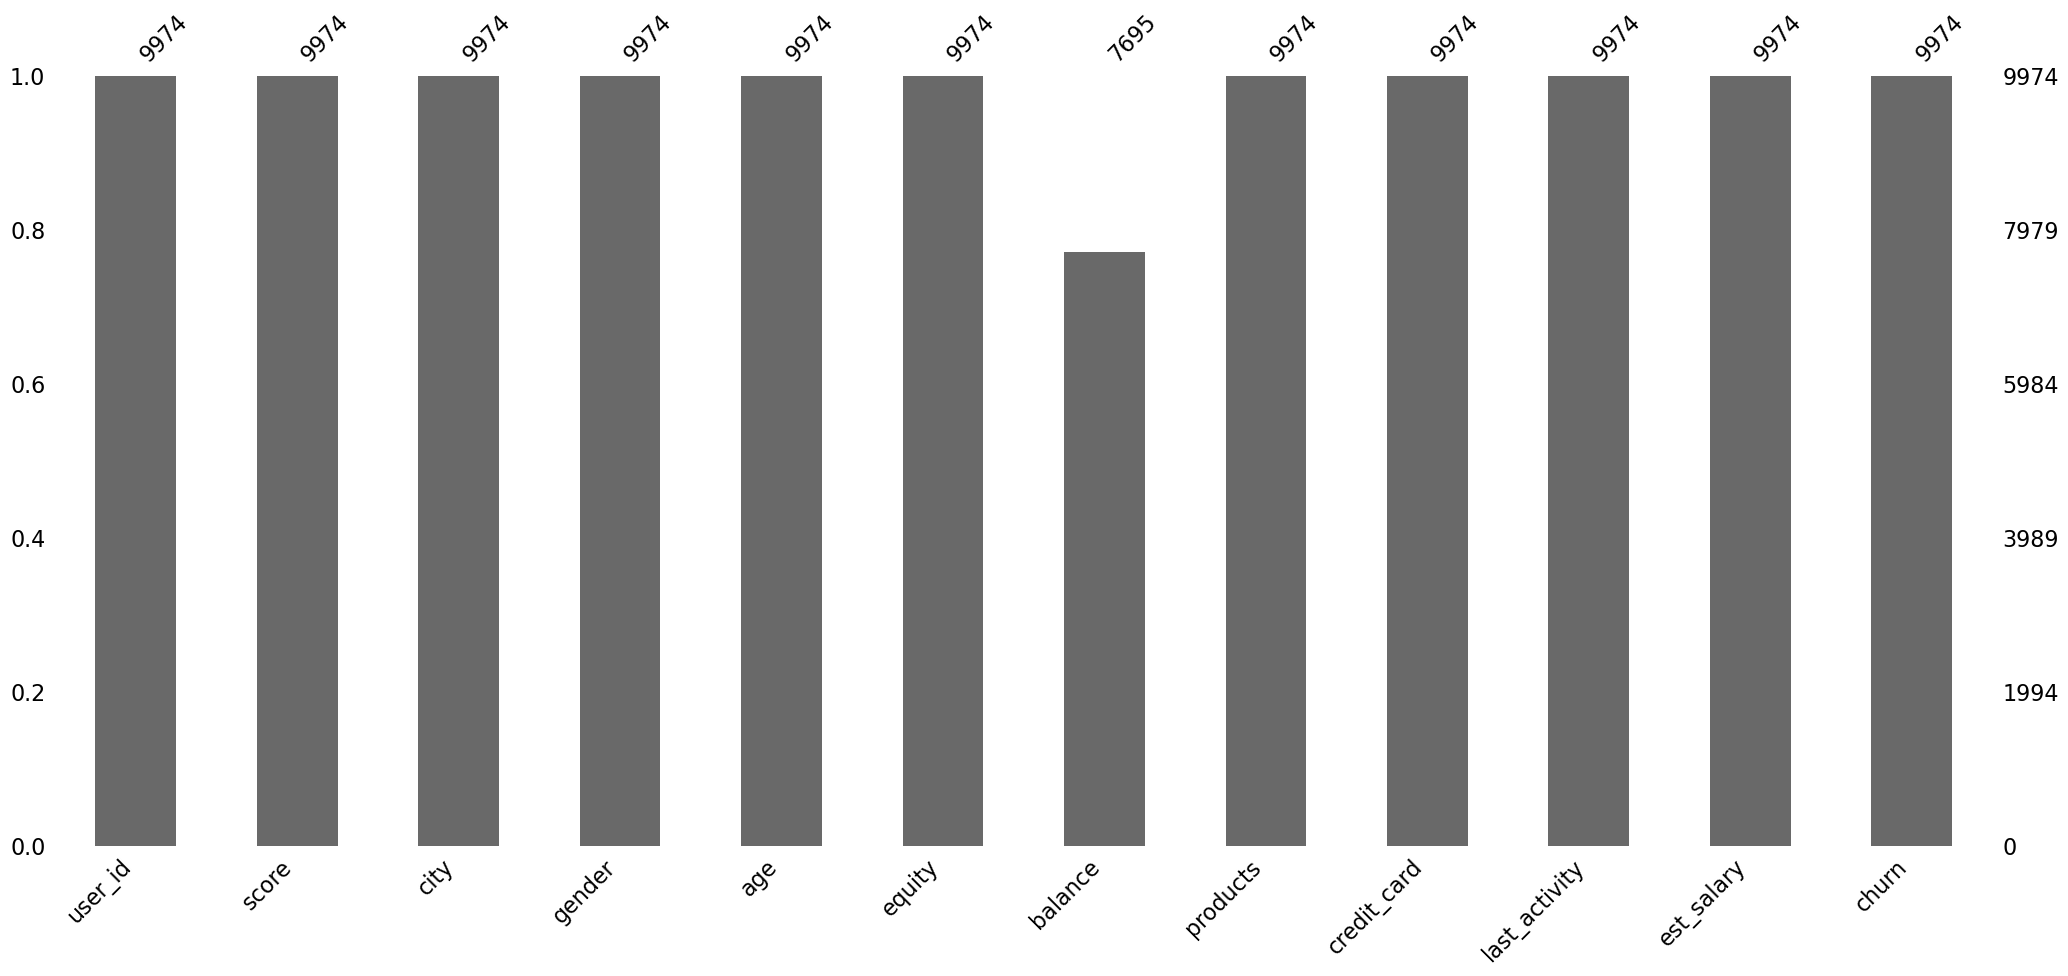

In [9]:
#визуализируем пропуски
msno.bar(data_f);

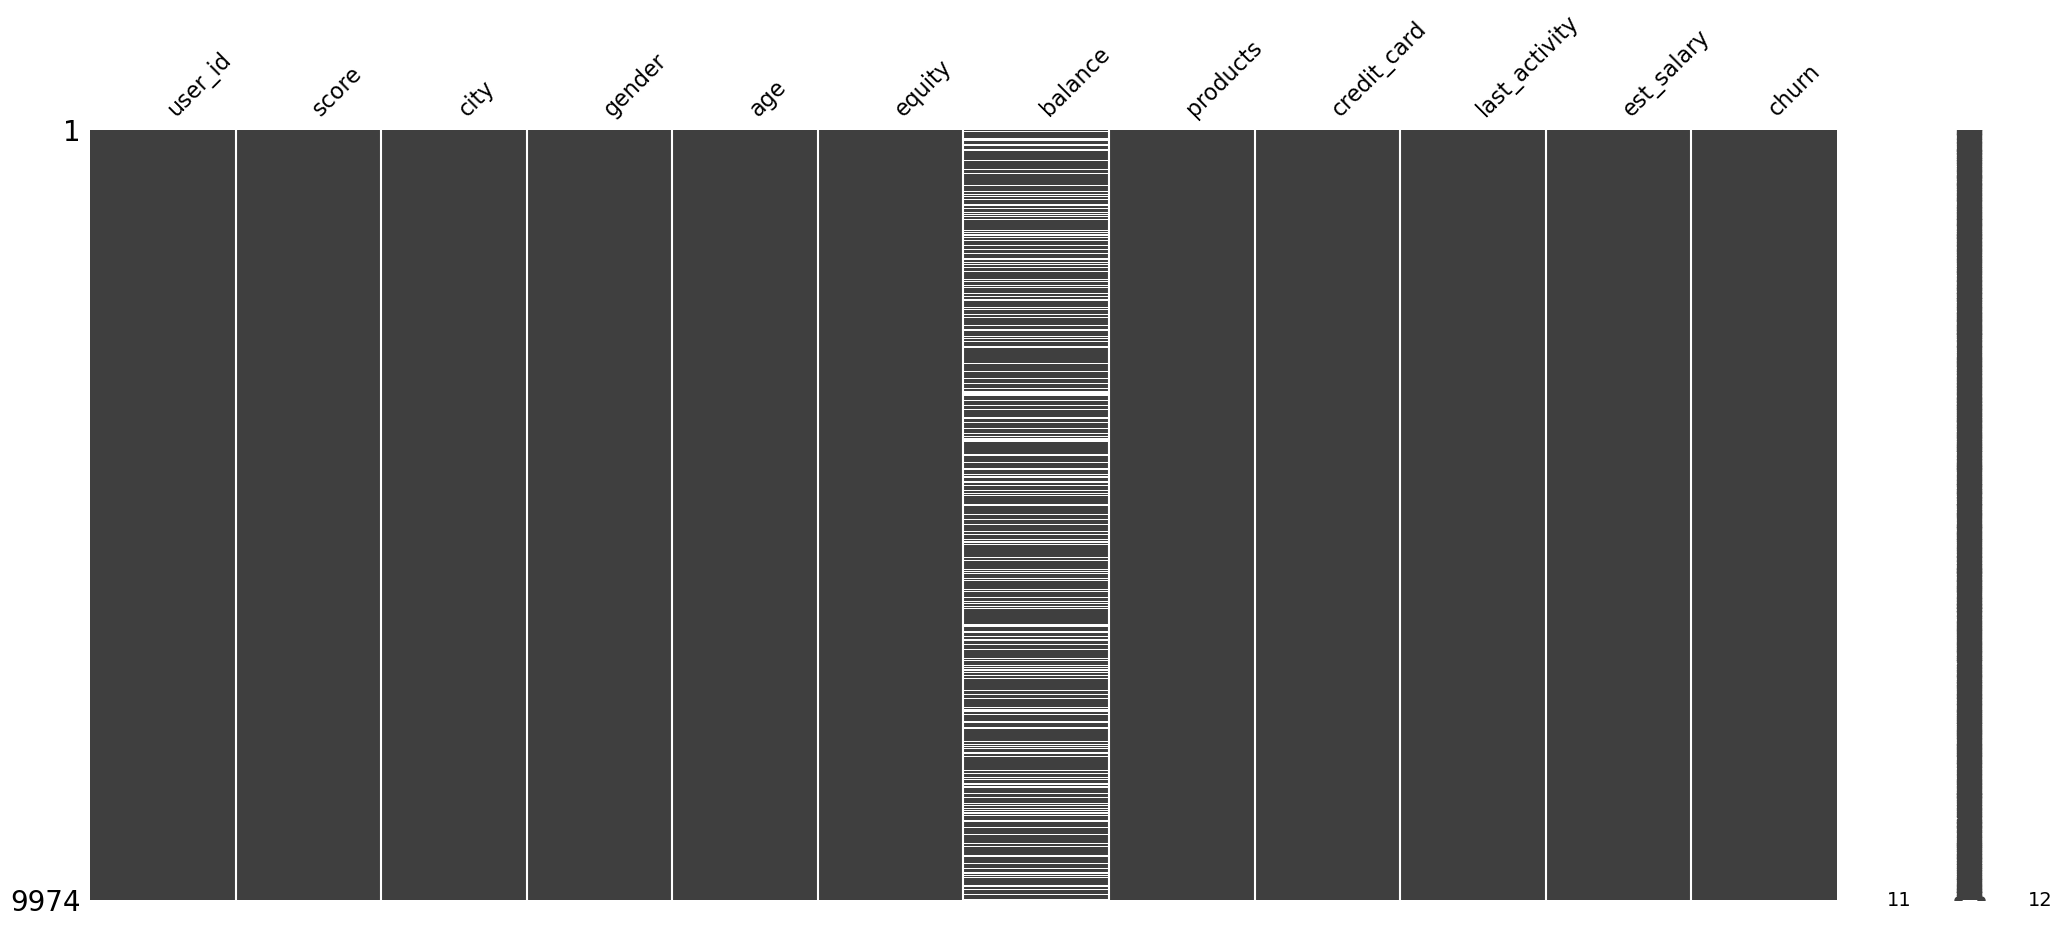

In [10]:
#посмотрим насколько случайно распределены пропуски
msno.matrix(data_f);

Пропуски разбросаны случайно

In [11]:
#создадим новое поле с индикатором пропуска в 'balance'
data_f['balance_null']=0
data_f['balance_null'].loc[data_f['balance'].isnull()]=1

Построим сводную таблицу по индикаторам пропусков и найдем медианные значения количественных полей.

In [12]:
for column in ['user_id', 'score', 'est_salary']:
    data_group=data_f.groupby(['balance_null'])[column].mean()
    print('--------------------------------')
    print(f'Группировка по {column}')
    print('--------------------------------')
    print(data_group)
    print(f'Различие:{round(percent_difference(data_group[0],data_group[1]))}%')
    

--------------------------------
Группировка по user_id
--------------------------------
balance_null
0   171710.89
1   171904.89
Name: user_id, dtype: float64
Различие:0%
--------------------------------
Группировка по score
--------------------------------
balance_null
0   843.74
1   865.36
Name: score, dtype: float64
Различие:3%
--------------------------------
Группировка по est_salary
--------------------------------
balance_null
0   124520.39
1   226345.42
Name: est_salary, dtype: float64
Различие:58%


Средняя зарплата сильно различается. У клиентов с пропусками в балансе зарплата более чем в 2 раза выше, чем у клиентов с активным балансом. В целом, есть вероятность, что у крупных компаний выплата ЗП идет строго в пределах зарплатного проекта с определенным банком. В таком случае средства автоматически (по желанию клиента) могут переводиться в более предпочтительный банк. Либо автоматически переводиться в инвестиции. Однозначного ответа нет, поэтому мы не можем заполнить пропуски на основании различия средних зарплат.

Возьмем категориальные столбцы и посмотрим как распределены пропуски по категориям:

In [13]:
for column in ['city', 'gender','equity','products', 'credit_card', 'last_activity', 'churn']:
    print('--------------------------------')
    print(data_f.groupby(column)[['balance_null']].agg(['mean','median']))
    

--------------------------------
          balance_null       
                  mean median
city                         
Ростов            0.17   0.00
Рыбинск           0.22   0.00
Ярославль         0.25   0.00
--------------------------------
       balance_null       
               mean median
gender                    
Ж              0.20   0.00
М              0.25   0.00
--------------------------------
       balance_null       
               mean median
equity                    
0              0.84   1.00
1              0.15   0.00
2              0.00   0.00
3              0.00   0.00
4              0.00   0.00
5              0.00   0.00
6              0.00   0.00
7              0.00   0.00
8              0.00   0.00
9              0.00   0.00
--------------------------------
         balance_null       
                 mean median
products                    
0                1.00   1.00
1                0.58   1.00
2                0.06   0.00
3                0.03   0.00

Есть зацепка. Пропуска в балансе у пользователей, у которых количество продуктов = 0 и у пользователей у которых количество баллов собственности = 0. Посмотрим сколько таких пользователей

In [14]:
data_f.loc[data_f['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,25063.96,1,1


1 пользователь, не походит. Ко всему прочему это ошибочная строка, так как у клиента банка есть хотя бы 1 продукт. Удаляем все строку.

In [15]:
data=data.loc[data['products']!=0]
data_f=data_f.loc[data_f['products']!=0]

In [16]:
data_f.loc[data['equity']==0].isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2164
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
balance_null        0
dtype: int64

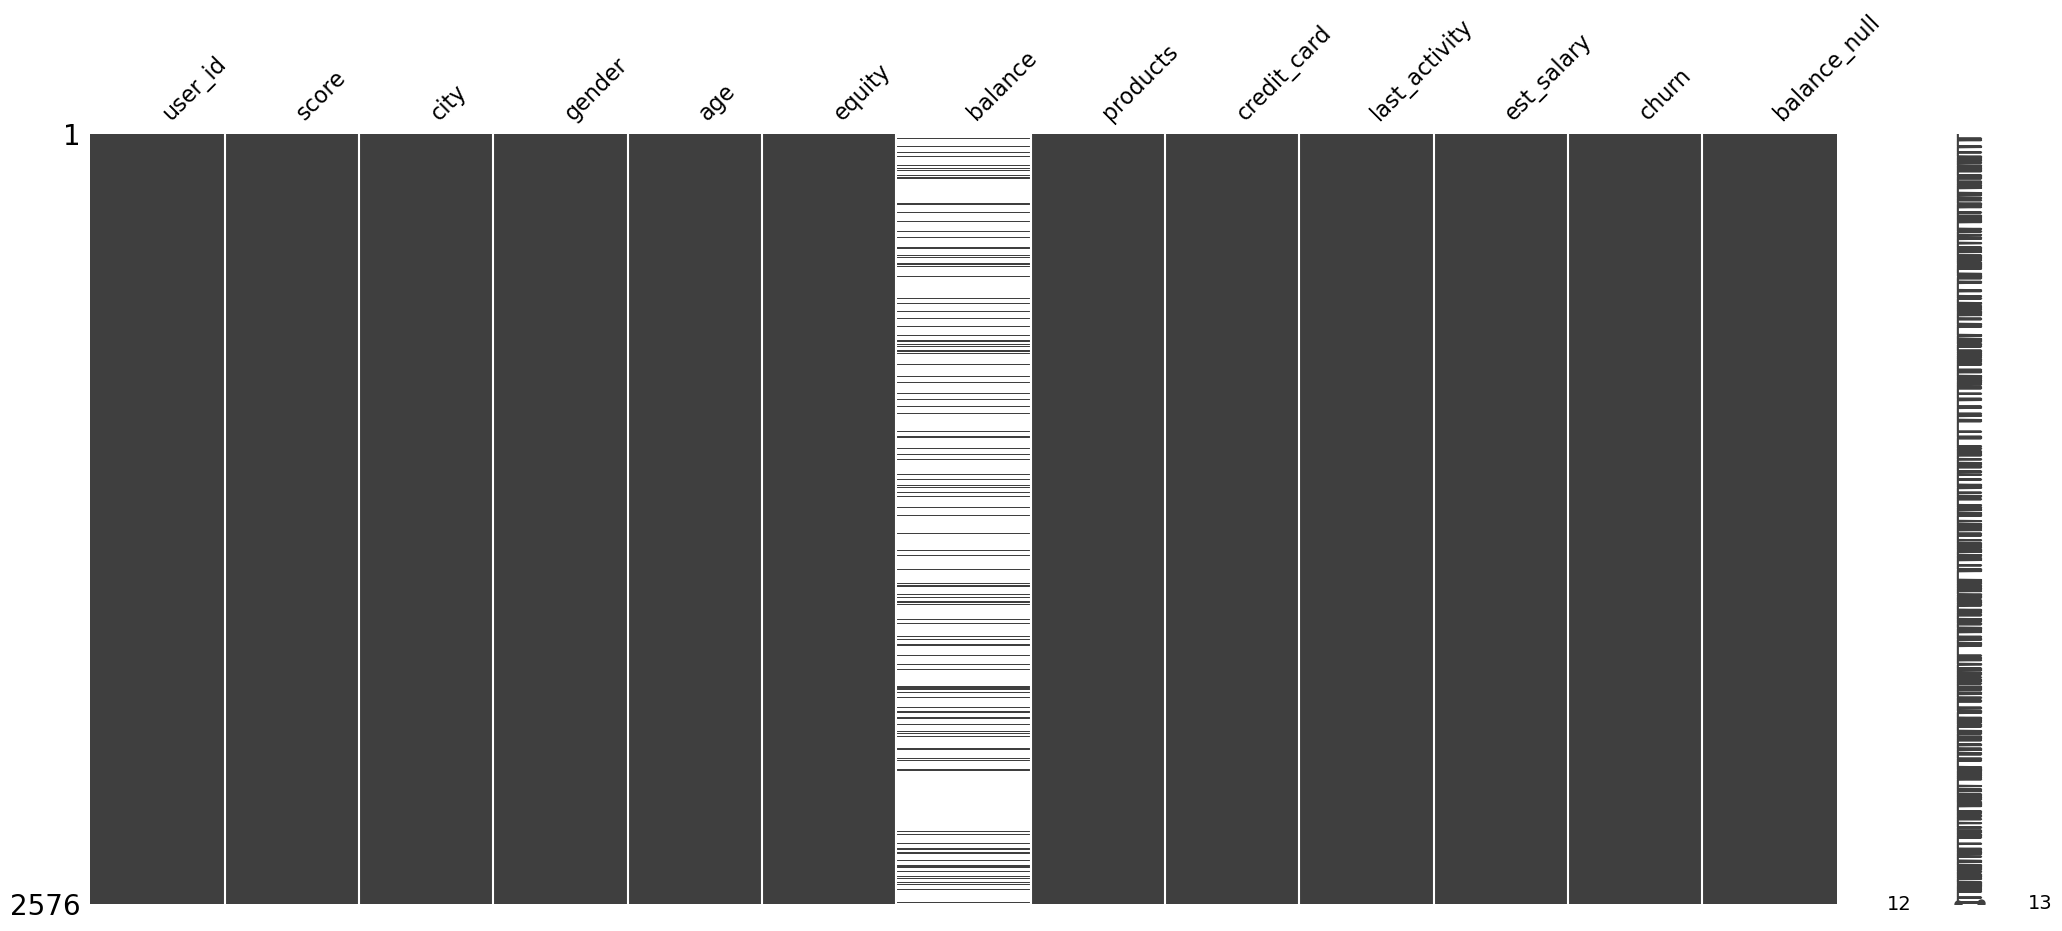

In [17]:
msno.matrix(data_f.loc[data_f['equity']==0]);

Пропуски в балансе у 2180 клиентов из 2592 (из тех, у кого количество баллов собственности = 0). 
84% пропусков.

Сравню группы клиентов с `equity=0` с отсутствующим балансом и с указанным. 

In [18]:
print('Клиенты с equity=0')
print('--------------------------------')
display(data_f.loc[(data_f['equity']==0)&(data_f['balance_null']==1)].median())
print('Клиенты с equity!=0')
print('--------------------------------')
display(data_f.loc[(data_f['equity']==0)&(data_f['balance_null']==0)].median())

Клиенты с equity=0
--------------------------------


user_id         171928.50
score              902.00
age                 40.00
equity               0.00
balance               NaN
products             1.00
credit_card          1.00
last_activity        1.00
est_salary      174864.93
churn                0.00
balance_null         1.00
dtype: float64

Клиенты с equity!=0
--------------------------------


user_id         168723.00
score              803.00
age                 40.00
equity               0.00
balance         133780.07
products             2.00
credit_card          1.00
last_activity        1.00
est_salary      101148.53
churn                0.00
balance_null         0.00
dtype: float64

Особой разницы в группах нет (разницу в зарплатах мы описали в предыдущем пункте). Оставляю пропуски, так как не хочу терять большую часть дата сета.

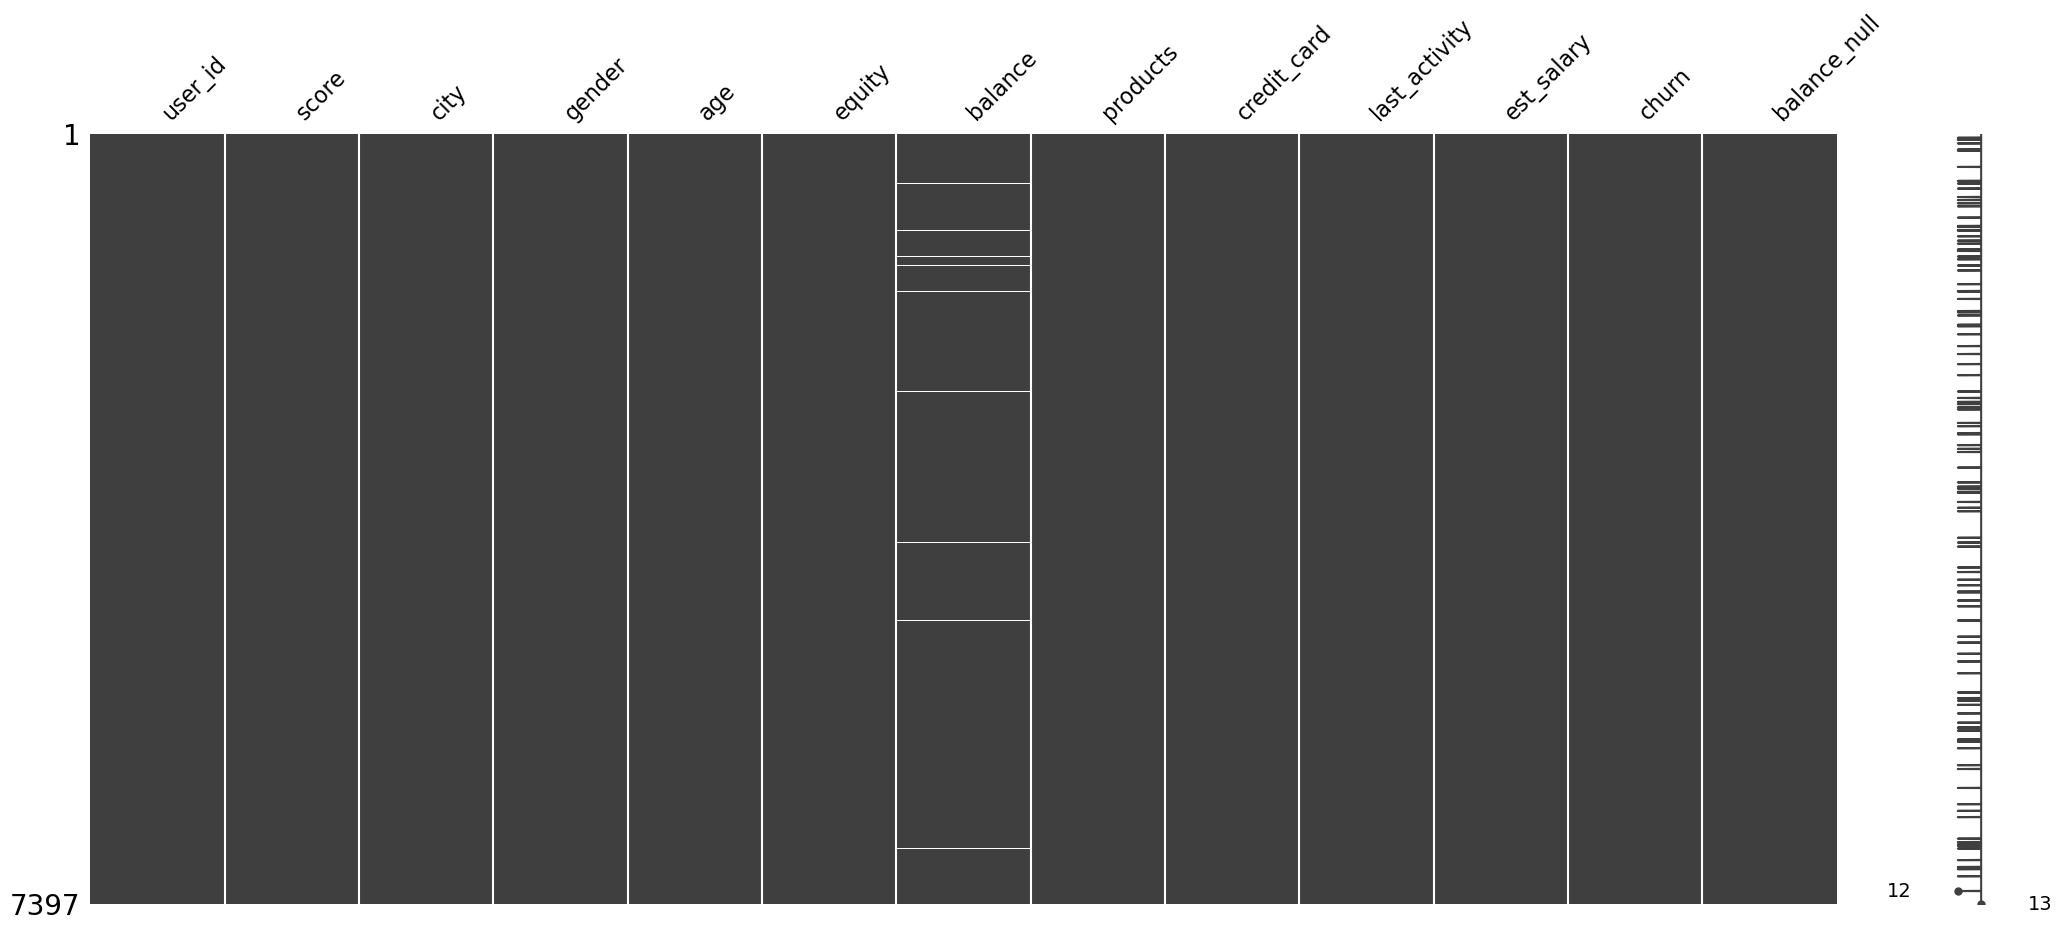

In [19]:
#смотрим визуально на оставшиеся пропуски
msno.matrix(data_f.loc[data_f['equity']!=0]);

Оставшиеся пропуски классифицирую как `MCAR` и удаляю. Подробности в выводе.

In [20]:
data_f=data_f.loc[~((data_f['balance'].isna())&(data_f['equity']!=0))]

In [21]:
#проверим результат
pd.DataFrame(round((data_f.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
equity,0.000000
balance,21.950000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [22]:
#проверим сколько данных потеряли в ходе работы с пропусками:
print('В результате удаления пропусков размер датасета уменьшился на {} %'.format(
    round((row_shape[0]-data_f.shape[0])/row_shape[0] * 100,2))
     )

В результате удаления пропусков размер датасета уменьшился на 1.41 %


Вывод: 
- В ходе анализа пропущенные значения были обнаружены в полях `age` и `balance`. Так как в `age` пропусков критически мало принимаю решение удалить строки. 
- В случае с `balance` была найдена зависимость пропусков с полем `equity`. При `equity = 0` в поле `balance` - 2180 пропущенных значений (85%) (всего в датасете в `balance` 2295 пропущенных значений). Так как мы не можем на основе 15% взять медиану и заполнить 85% - принимаю решение оставить пропуски. Классификация этих пропусков однозначно `MNAR` (Missing Not At Random / Отсутствует не случайно). 
- Пропуски вне `equity=0` (оставшиеся) - `MCAR` (Missing Completely At Random / Отсутствует совершенно случайно).
- В ходе обработки пропусков потеря данных незначительная - 1,41%

### Обработка дубликатов

Для начала, попробуем найти явные дубликаты строк.

In [23]:
data_f.duplicated().sum()

0

Взглянем на дубликаты по столбцам.

In [24]:
for column in data_f.columns:
    print(f'Количество дубликатов в столбце {column}:\n {data_f.duplicated(subset=column).sum()}\n')

Количество дубликатов в столбце user_id:
 50

Количество дубликатов в столбце score:
 9511

Количество дубликатов в столбце city:
 9856

Количество дубликатов в столбце gender:
 9857

Количество дубликатов в столбце age:
 9791

Количество дубликатов в столбце equity:
 9849

Количество дубликатов в столбце balance:
 2167

Количество дубликатов в столбце products:
 9854

Количество дубликатов в столбце credit_card:
 9857

Количество дубликатов в столбце last_activity:
 9857

Количество дубликатов в столбце est_salary:
 3

Количество дубликатов в столбце churn:
 9857

Количество дубликатов в столбце balance_null:
 9857



Во всех столбцах дубликаты допустимы, кроме столбца user_id. Выведем строки в которых есть дубликаты user_id.

In [25]:
data_f.loc[data_f['user_id'].isin(data_f.loc[data_f['user_id'].duplicated()]['user_id'])].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0,1
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1,0
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0,1
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1,0
5896,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,146427.96,0,1
1411,123461,829.00,Ярославль,Ж,59.00,0,96222.44,2,0,1,102771.55,1,0
8638,123461,934.00,Рыбинск,М,34.00,0,NaN,2,1,0,291619.27,0,1
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0,0
8164,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1,0


Во всех строках уникальные данные. Разные города, разный пол и возраст. Дубликаты в `user_id`, вероятно, являются техническим сбоем при выгрузке базы из 1С или другой платформы. Добавим индикатор `_1` к каждому дубликату `user_id` и пойдем дальше.

In [26]:
#выводим индексы дубликатов (первых)
duplicated_index = data_f[data_f['user_id'].duplicated(keep='first')].index
#изменяем значение user_id для найденных индексов
data_f.loc[duplicated_index, 'user_id'] = data_f.loc[duplicated_index, 'user_id'] * -1

In [27]:
data_f.duplicated(subset='user_id').sum()

0

Явные дубликаты обработаны.

Переходим к неявным дубликатам. Просмотрим уникальные значения по столбцам.

In [28]:
for column in data_f.columns:
    print('------------------------------------------------------------------')
    print(f'Уникальные значения по столбцу {column}')
    print(data_f[column].unique())
    print('------------------------------------------------------------------')

------------------------------------------------------------------
Уникальные значения по столбцу user_id
[183012 146556 120722 ... 115639 148700  96267]
------------------------------------------------------------------
------------------------------------------------------------------
Уникальные значения по столбцу score
[ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  812.  809.  749.  873.  859.
  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.  891.  788.
  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.  915.  985.
  870.  897.  763.  737.  774.  686. 1000.  875.  819.  869.  854.  810.
  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.  726.
  881.  975.  852.

Неявные дубликаты отсутствуют.

Закодируем категориальные данные. (Понадобится для проведения корреляционного анализа)

In [29]:
data_f.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,1
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0


In [30]:
#делаем копию столбцов
data_f = pd.get_dummies(data_f, columns=['city'])
data_f['gender'] = data_f['gender'].map({'Ж': 0, 'М': 1})

Вывод:
- В ходе анализа дубликатов были обнаружены явные дубликаты в поле `user_id`. При этом по каждому дубликату в других полях находится уникальная информация, которая не дублируется. Появление данных дубликатов связано с технической особенностью ведения базы, либо несогласованностью заполнения данного поля при регистрации нового клиента. Все дубликаты `user_id` я домножил на -1, таким образом сохранил уникальные данные.
- неявные дубликаты обнаружены не были

## Исследовательский анализ

In [31]:
print(f'Доля оттока по всему банку: {round(data_f["churn"].mean()*100)} %')


Доля оттока по всему банку: 18 %


### Построю сводные таблицы и визуализацию по категориальным полям, в которых будут количество клиентов по категориям в оттоке и не в оттоке. В крайнем поле отображу долю пользователей в оттоке в текущей категории.

In [32]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


--------------------------------------


churn,city,not_churn,churn,churn_rate
0,Ростов,1151,266,18.80
1,Рыбинск,2258,436,16.20
2,Ярославль,4771,1117,19.00


--------------------------------------


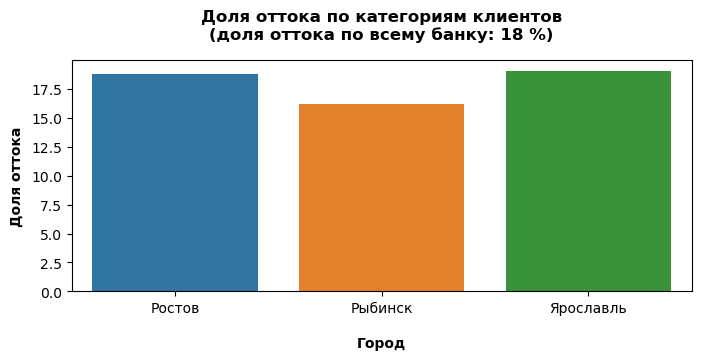

--------------------------------------


churn,gender,not_churn,churn,churn_rate
0,Ж,4358,636,12.70
1,М,3822,1183,23.60


--------------------------------------


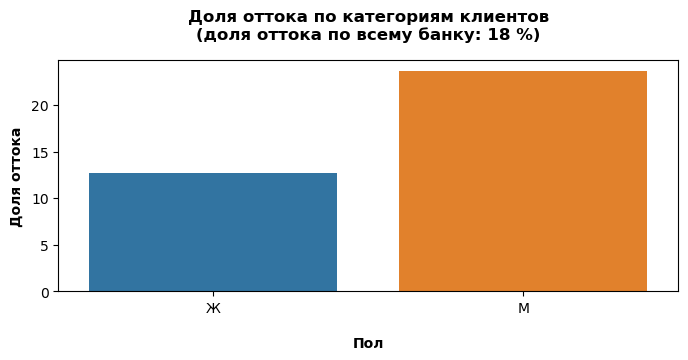

--------------------------------------


churn,equity,not_churn,churn,churn_rate
0,0,2502,90,3.50
1,1,681,93,12.00
2,2,886,166,15.80
3,3,1221,321,20.80
4,4,1386,464,25.10
5,5,1341,577,30.10
6,6,103,58,36.00
7,7,43,37,46.20
8,8,11,6,35.30
9,9,6,7,53.80


--------------------------------------


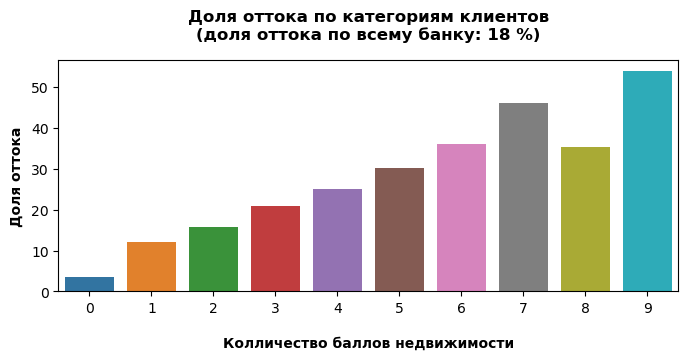

--------------------------------------


churn,products,not_churn,churn,churn_rate
0,1,3106,235,7.00
1,2,4147,979,19.10
2,3,742,297,28.60
3,4,174,300,63.30
4,5,11,8,42.10


--------------------------------------


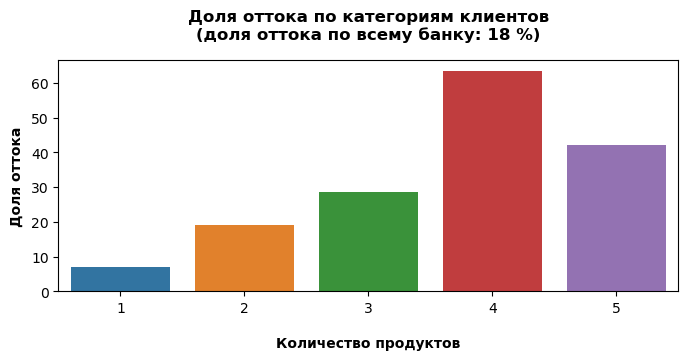

--------------------------------------


churn,credit_card,not_churn,churn,churn_rate
0,0,2379,816,25.50
1,1,5801,1003,14.70


--------------------------------------


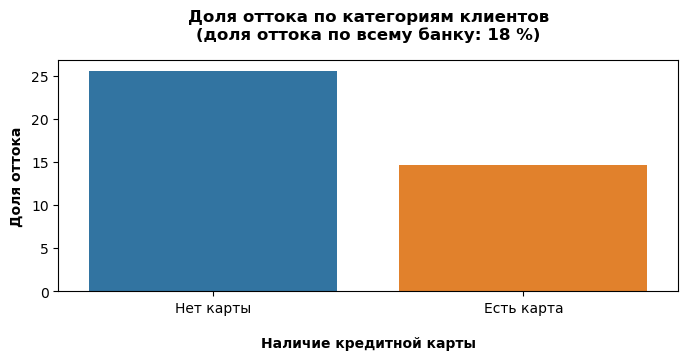

--------------------------------------


churn,last_activity,not_churn,churn,churn_rate
0,0,4223,541,11.40
1,1,3957,1278,24.40


--------------------------------------


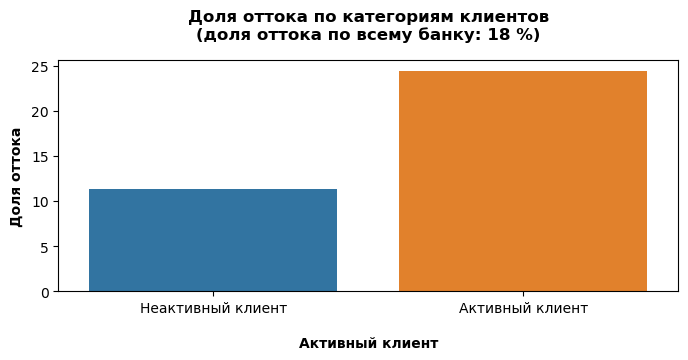

In [33]:
for column in ['city','gender','equity','products','credit_card','last_activity']:
    globals()[f'data_churn_{column}']=data.pivot_table(
    index=column,
    values='user_id',
    columns='churn',
    aggfunc='count'
    ).reset_index()
    globals()[f'data_churn_{column}']=globals()[f'data_churn_{column}'].rename(columns={0:'not_churn',1:'churn'})
    globals()[f'data_churn_{column}']['churn_rate']=round(
        globals()[f'data_churn_{column}']['churn']*100/(
            globals()[f'data_churn_{column}']['not_churn']+globals()[f'data_churn_{column}']['churn']
        ),1
    )
    print('--------------------------------------')
    display(globals()[f'data_churn_{column}'])
    print('--------------------------------------')
    plt.figure(figsize=(8,3))
    sns.barplot(
        data=globals()[f'data_churn_{column}'],
        x=column,
        y='churn_rate'
    )
    name={ #словарь руссификации
        'city':'Город',
        'gender':'Пол',
        'equity':'Колличество баллов недвижимости',
        'products':'Количество продуктов',
        'credit_card':'Наличие кредитной карты',
        'last_activity':'Активный клиент'
    }
    plt.xlabel(name.get(column), fontsize=10, fontweight="bold", labelpad=15)
    if column in ['credit_card']:
        plt.xticks(ticks=[0, 1], labels=['Нет карты', 'Есть карта'])
    elif column in ['last_activity']:
        plt.xticks(ticks=[0, 1], labels=['Неактивный клиент', 'Активный клиент'])    
    plt.ylabel('Доля оттока', fontsize=10, fontweight="bold", labelpad=5)
    plt.title(f'Доля оттока по категориям клиентов\n(доля оттока по всему банку: {round(data_f["churn"].mean()*100)} %)', fontsize=12, fontweight="bold", pad=15)
    plt.show()


Интерпретация:
   - Отток по городам примерно одинаковый, в пределах 15-20%
   - Среди мужчин повышенный отток, в отличии от женщин, используем это в сигментации клиентов.
   - С ростом баллов собственности - отток уверенно растет. Это может быть связано с невыгодными условиями кредитования под залог недвижимости.
   - С ростом количества продуктов отток также растет. Пик призодится на 4 продукта - отток 60%. Довольно много. Возможно, клиентов отпугивают невыгодные условия продуктов (кредитование и вклады).
   - Отток среди клиентов с кредитной картой ниже, скорее всего по кредитным картам условия приемлемые.
   - Отток среди активных клиентов выше. (возможно, неактивные клиенты перестали пользоваться услугами не уведомив банк о каких либо недостатках в продуктах).
   
На первый взгляд, в отток попадают клиенты у которых появляются дополнительные активы (недвижимость в данном случае). Скорее всего у этих же клиентов в целом растут доходы и условия банка не подходят для более состоятельных клиентов. Будем проверять догадку далее.

### Проанализируем количественные поля. Избавимся от выбросов, а также построим гистограммы в разрезе оттока пользоватлей.

        score     age  est_salary      balance
count 9859.00 9859.00     9859.00      7695.00
mean   848.44   42.74   147010.22    827245.59
std     65.02   12.18   138744.49   1980327.41
min    642.00   18.00     2546.30         0.00
25%    802.00   33.00    74942.45    295698.71
50%    852.00   40.00   119118.57    524295.33
75%    899.00   51.00   173960.92    980051.21
max   1000.00   86.00  1395064.45 119113552.01


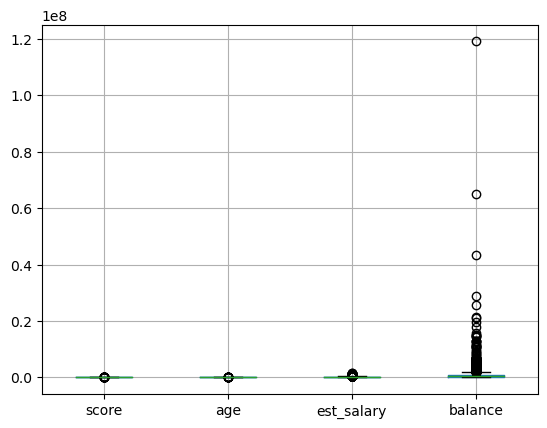

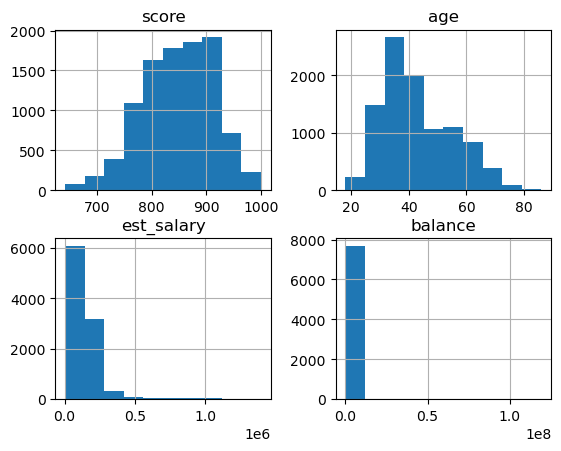

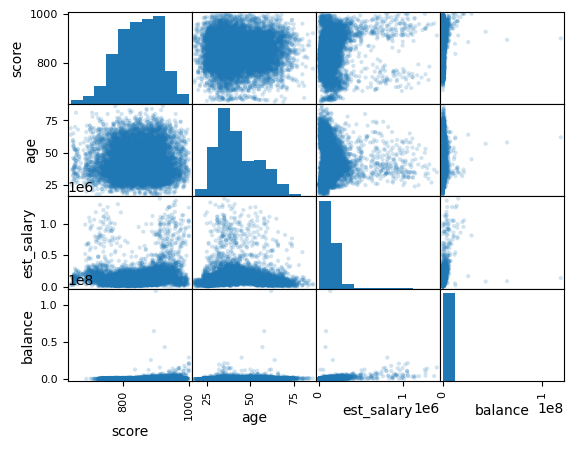

In [34]:
#параметры описательной статистика
print(data_f[['score','age','est_salary','balance']].describe())

#боксплоты
data_f[['score','age','est_salary','balance']].boxplot()
plt.show()

#гистограммы
data_f[['score','age','est_salary','balance']].hist()
plt.show()

#диаграммы рассеяния для всех пар числовых полей
pd.plotting.scatter_matrix(data_f[['score','age','est_salary','balance']], alpha=0.2)
plt.show()

Аномально большой баланс удалю (больше 20 миллионов), чтобы не портить анализ исключениями. Остальные данные без существенных аномалий (зарплату не отношу к аномалиям (минимальное значение), возможно это просто доп. доход), выбросов нет, в случае со средней зарплатой - распределение не является нормальным, поэтому и выбросы не анализируем. 

Уберем супер-аномальные балансы, свыше 20 миллионов (оставляя пропуски):

In [35]:
data_f=data_f.loc[(data_f['balance'] < 20000000) | (data_f['balance'].isna())]

In [36]:
#проверим сколько данных потеряли в ходе работы с пропусками:
print('В результате удаления пропусков размер датасета уменьшился на {} %'.format(
    round((row_shape[0]-data_f.shape[0])/row_shape[0] * 100,2))
     )

В результате удаления пропусков размер датасета уменьшился на 1.48 %


Делим датасет на клиентов в оттоке и нет.

In [37]:
data_churn=data_f[data_f['churn']==1]
data_not_churn=data_f[data_f['churn']==0]

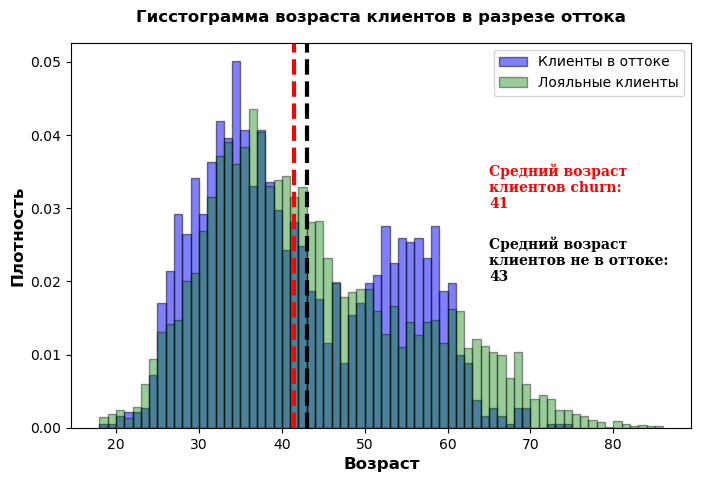

In [38]:
plt.figure(figsize=(8,5))
#строим гистограмму клиентов по возрасту в разрезе оттока
#клиенты в оттоке
plt.subplot(1,1,1)
data_churn['age'].plot(
    kind='hist',
    bins=round(data_churn['age'].max()-data_churn['age'].min()), 
    alpha=0.5,
    ec='black',
    color='blue',
    label='Клиенты в оттоке',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_churn['age'].mean(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.text(
    65, 
    0.03,
    'Средний возраст \nклиентов churn:\n{}'.format(round(data_churn['age'].mean())), 
    color='red', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.title('Гисстограмма возраста клиентов в разрезе оттока',fontsize=12, fontweight="bold", pad=15)




#клиенты не в оттоке
plt.subplot(1,1,1)
data_not_churn['age'].plot(
    kind='hist',
    bins=round(data_not_churn['age'].max()-data_not_churn['age'].min()), 
    alpha=0.4,
    ec='black',
    color='green',
    label='Лояльные клиенты',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_not_churn['age'].mean(),
                linewidth=3, 
                color='black', 
                linestyle='--')
plt.text(
    65, 
    0.02,
    'Средний возраст \nклиентов не в оттоке:\n{}'.format(round(data_not_churn['age'].mean())), 
    color='black', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.xlabel('Возраст',fontsize=12, fontweight="bold")
plt.ylabel('Плотность',fontsize=12, fontweight="bold")
plt.subplots_adjust(hspace=1)
plt.legend()
plt.show()

Наблюдаются области возрастов клиентов, которые склонны к оттоку:
- с 25 до 34
- с 50 до 60

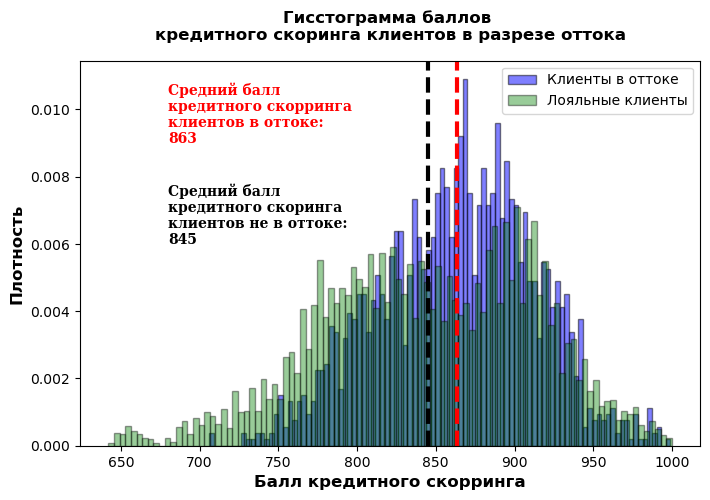

In [39]:
plt.figure(figsize=(8,5))
#строим гистограмму клиентов по баллам кредитного скорринга в разрезе оттока
#клиенты в оттоке
plt.subplot(1,1,1)
data_churn['score'].plot(
    kind='hist',
    bins=100, 
    alpha=0.5,
    ec='black',
    color='blue',
    label='Клиенты в оттоке',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_churn['score'].mean(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.text(
    680, 
    0.009,
    'Средний балл \nкредитного скорринга \nклиентов в оттоке:\n{}'.format(round(data_churn['score'].mean())), 
    color='red', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.title('Гисстограмма баллов \nкредитного скоринга клиентов в разрезе оттока',fontsize=12, fontweight="bold", pad=15)




#клиенты не в оттоке
plt.subplot(1,1,1)
data_not_churn['score'].plot(
    kind='hist',
    bins=100, 
    alpha=0.4,
    ec='black',
    color='green',
    label='Лояльные клиенты',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_not_churn['score'].mean(),
                linewidth=3, 
                color='black', 
                linestyle='--')
plt.text(
    680, 
    0.006,
    'Средний балл \nкредитного скоринга \nклиентов не в оттоке:\n{}'.format(round(data_not_churn['score'].mean())), 
    color='black', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.xlabel('Балл кредитного скорринга',fontsize=12, fontweight="bold")
plt.ylabel('Плотность',fontsize=12, fontweight="bold")
plt.subplots_adjust(hspace=1)
plt.legend()
plt.show()

Очень хорошо видно, что когда кредитный скорринг клиента достигает 850, что значит, что его доходы растут, клиент с большей вероятностью попадает в отток. Область оттока:
- 850 - 950 баллов

В случае с балансом имеем большой "правый хвост" поэтому гистограмму разделю на 2 части (нормализую плотность для каждой)

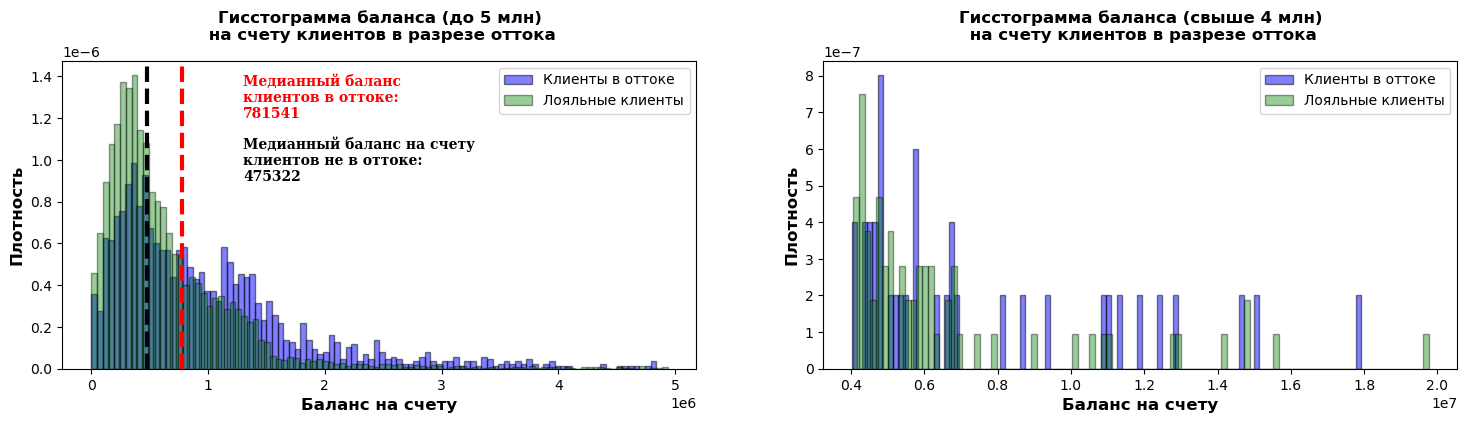

In [40]:
plt.figure(figsize=(18,4))
#строим гистограмму клиентов по балансу на счете в разрезе оттока
#клиенты в оттоке
plt.subplot(1,2,1)
data_churn.query('balance<5000000')['balance'].plot(
    kind='hist',
    bins=100, 
    alpha=0.5,
    ec='black',
    color='blue',
    label='Клиенты в оттоке',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_churn['balance'].median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.text(
    1300000, 
    0.0000012,
    'Медианный баланс \nклиентов в оттоке:\n{}'.format(round(data_churn['balance'].median())), 
    color='red', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.title('Гисстограмма баланса (до 5 млн)\n на счету клиентов в разрезе оттока',fontsize=12, fontweight="bold", pad=15)

#клиенты не в оттоке
plt.subplot(1,2,1)
data_not_churn.query('balance<5000000')['balance'].plot(
    kind='hist',
    bins=100, 
    alpha=0.4,
    ec='black',
    color='green',
    label='Лояльные клиенты',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_not_churn['balance'].median(),
                linewidth=3, 
                color='black', 
                linestyle='--')
plt.text(
    1300000, 
    0.0000009,
    'Медианный баланс на счету \nклиентов не в оттоке:\n{}'.format(round(data_not_churn['balance'].median())), 
    color='black', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.xlabel('Баланс на счету',fontsize=12, fontweight="bold")
plt.ylabel('Плотность',fontsize=12, fontweight="bold")
plt.subplots_adjust(hspace=1)
plt.legend()



plt.subplot(1,2,2)
data_churn.query('balance>4000000')['balance'].plot(
    kind='hist',
    bins=100, 
    alpha=0.5,
    ec='black',
    color='blue',
    label='Клиенты в оттоке',
    density=True #нормализую гистограммы
    )

plt.title('Гисстограмма баланса (свыше 4 млн)\n на счету клиентов в разрезе оттока',fontsize=12, fontweight="bold", pad=15)

#клиенты не в оттоке
plt.subplot(1,2,2)
data_not_churn.query('balance>4000000')['balance'].plot(
    kind='hist',
    bins=100, 
    alpha=0.4,
    ec='black',
    color='green',
    label='Лояльные клиенты',
    density=True #нормализую гистограммы
    )
plt.xlabel('Баланс на счету',fontsize=12, fontweight="bold")
plt.ylabel('Плотность',fontsize=12, fontweight="bold")
plt.subplots_adjust(hspace=1)
plt.legend()
plt.show()


Снова видим картину, которая показывает, что чем состоятельнее клиент тем выше вероятность того, что он окажется в оттоке. Резко повышается вероятность оттока клиентов, если на его балансе больше 1 млн рублей.

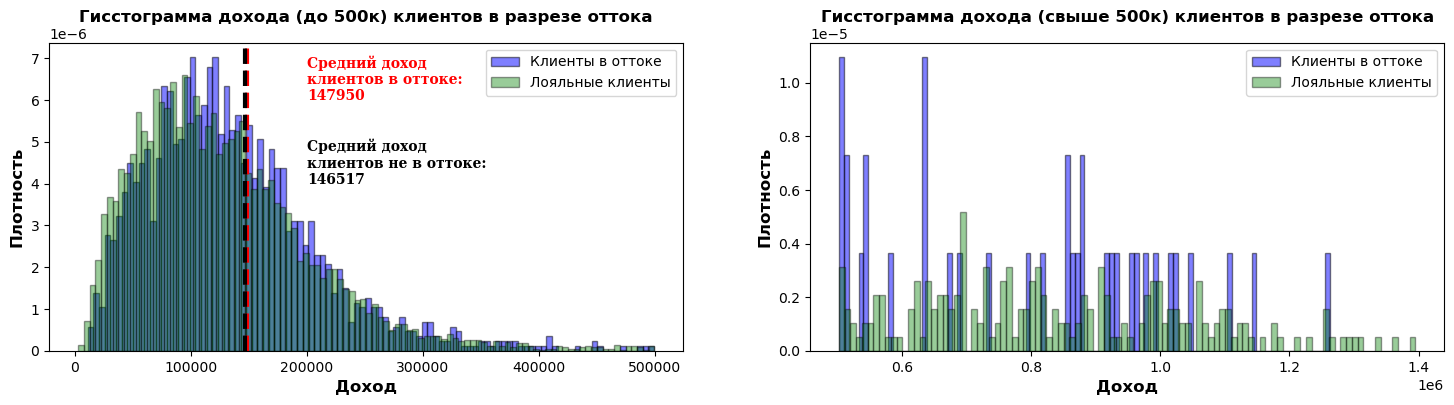

In [41]:
plt.figure(figsize=(18,4))
#строим гистограмму клиентов по доходу в разрезе оттока
#клиенты в оттоке
plt.subplot(1,2,1)
data_churn.query('est_salary<500000')['est_salary'].plot(
    kind='hist',
    bins=100, 
    alpha=0.5,
    ec='black',
    color='blue',
    label='Клиенты в оттоке',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_churn['est_salary'].mean(),
                linewidth=3, 
                color='red', 
                linestyle='--')
plt.text(
    200000, 
    0.000006,
    'Средний доход \nклиентов в оттоке:\n{}'.format(round(data_churn['est_salary'].mean())), 
    color='red', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.title('Гисстограмма дохода (до 500к) клиентов в разрезе оттока',fontsize=12, fontweight="bold", pad=15)




#клиенты не в оттоке
plt.subplot(1,2,1)
data_not_churn.query('est_salary<500000')['est_salary'].plot(
    kind='hist',
    bins=100, 
    alpha=0.4,
    ec='black',
    color='green',
    label='Лояльные клиенты',
    density=True #нормализую гистограммы
    )
plt.axvline(x=data_not_churn['est_salary'].mean(),
                linewidth=3, 
                color='black', 
                linestyle='--')
plt.text(
    200000, 
    0.000004,
    'Средний доход \nклиентов не в оттоке:\n{}'.format(round(data_not_churn['est_salary'].mean())), 
    color='black', 
    ha='left', 
    va='baseline',
    fontdict={'family': 'serif', 'size': 10, 'weight': 'bold'})
plt.xlabel('Доход',fontsize=12, fontweight="bold")
plt.ylabel('Плотность',fontsize=12, fontweight="bold")
plt.subplots_adjust(hspace=1)
plt.legend()

plt.subplot(1,2,2)
data_churn.query('est_salary>500000')['est_salary'].plot(
    kind='hist',
    bins=100, 
    alpha=0.5,
    ec='black',
    color='blue',
    label='Клиенты в оттоке',
    density=True #нормализую гистограммы
    )

plt.title('Гисстограмма дохода (свыше 500к) клиентов в разрезе оттока',fontsize=12, fontweight="bold", pad=15)




#клиенты не в оттоке
plt.subplot(1,2,2)
data_not_churn.query('est_salary>500000')['est_salary'].plot(
    kind='hist',
    bins=100, 
    alpha=0.4,
    ec='black',
    color='green',
    label='Лояльные клиенты',
    density=True #нормализую гистограммы
    )
plt.xlabel('Доход',fontsize=12, fontweight="bold")
plt.ylabel('Плотность',fontsize=12, fontweight="bold")
plt.subplots_adjust(hspace=1)
plt.legend()
plt.show()

Чем больше доход у клиента, тем выше вероятность того, что он окажется в оттоке. Резко повышается вероятность оттока клиентов, если его доход превышает 100к в месяц.

Вывод:
Вероятнее всего в оттоке оказываются клиенты, чьи доходы и счета растут, клиенты с высоким кредитным скоррингом.

### Корреляционный анализ

In [42]:
#выводим датасет
data_f.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.00,0,25.00,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861.00,0,37.00,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892.00,0,30.00,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866.00,0,51.00,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730.00,1,34.00,5,174.00,1,1,0,67353.16,1,0,0,0,1


In [43]:
data_f.columns

Index(['user_id', 'score', 'gender', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_null',
       'city_Ростов', 'city_Рыбинск', 'city_Ярославль'],
      dtype='object')

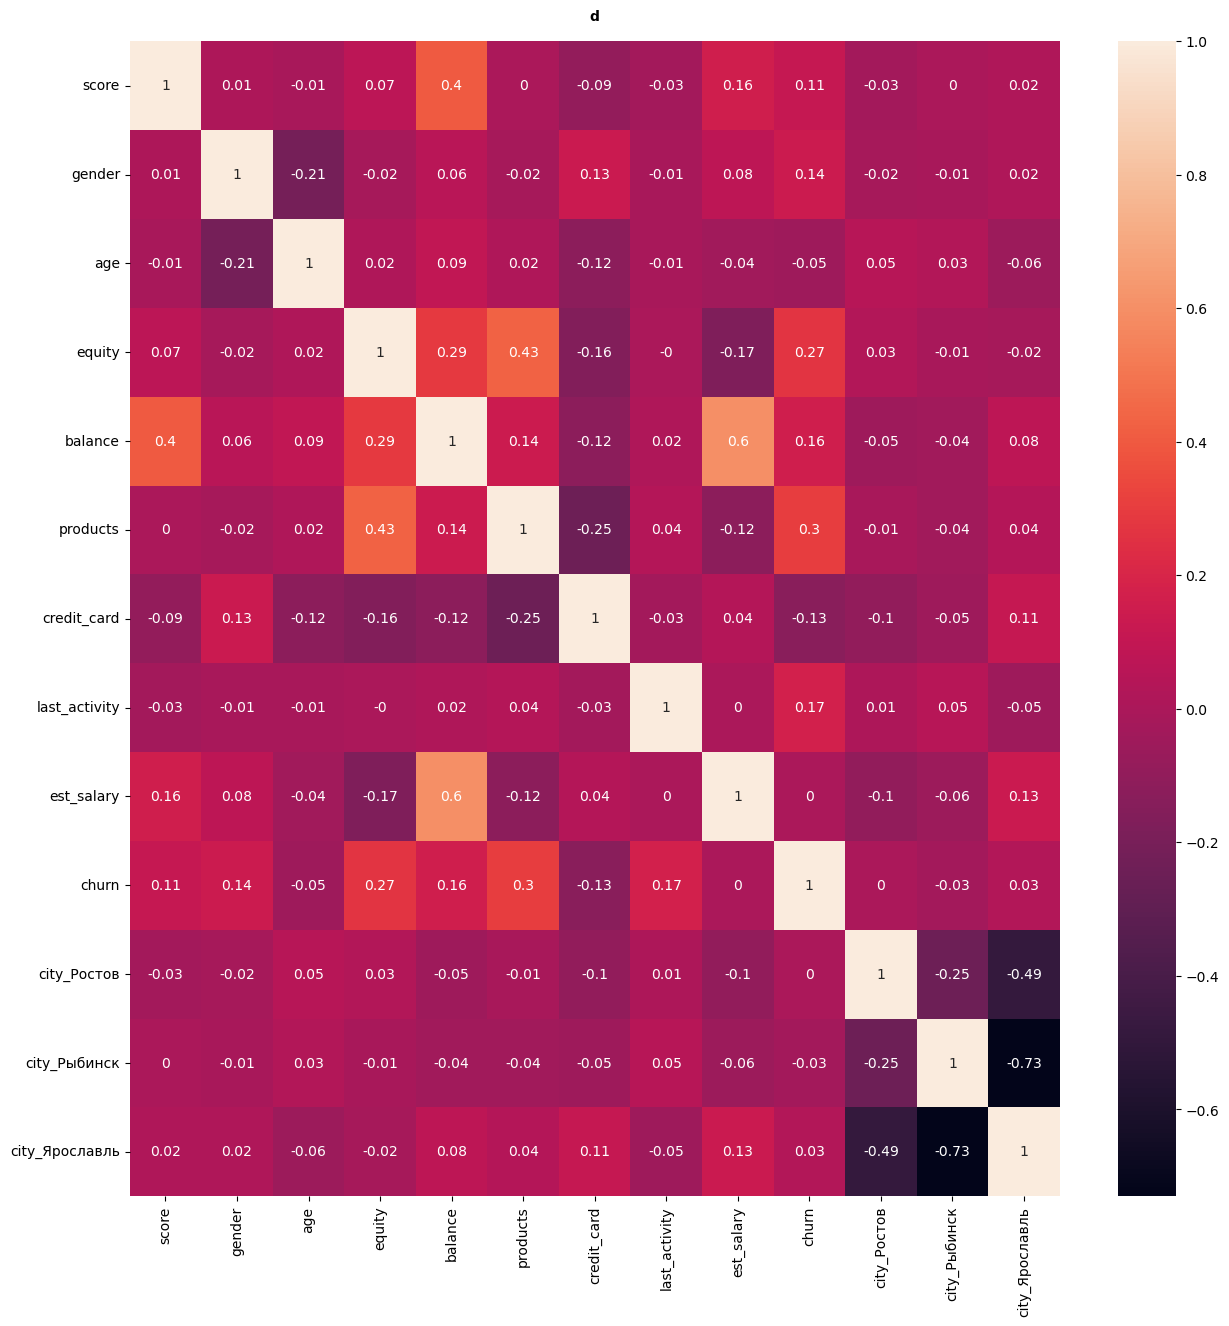

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(data_f.drop(['user_id', 'balance_null'], axis=1).corr().round(2),annot=True)
plt.title('d', fontsize=10, fontweight="bold", pad=15)
plt.show()

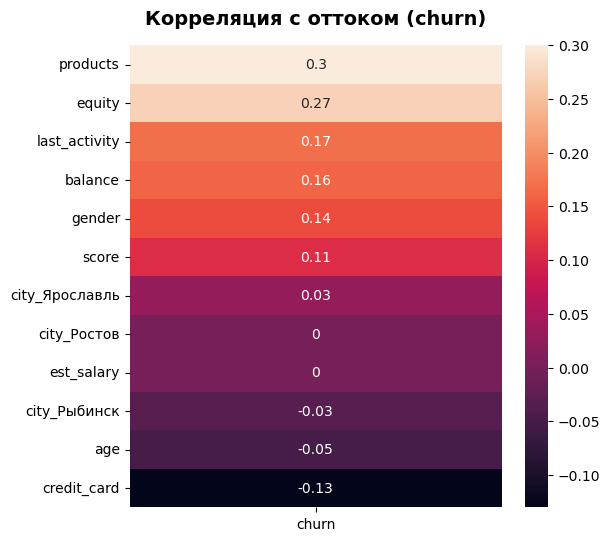

In [45]:
#оставляем только столбец `churn`
churn_corr = data_f.corr()['churn']

#отображаем тепловую карту
plt.figure(figsize=(6, 6))
sns.heatmap(
    churn_corr[['score', 'gender', 'age', 'equity', 'balance', 'products',
                        'credit_card', 'last_activity', 'est_salary', 'city_Ростов', 
                        'city_Рыбинск', 'city_Ярославль']]\
    .to_frame()\
    .sort_values(by='churn',ascending=False)\
    .round(2), annot=True)
plt.title('Корреляция с оттоком (churn)', fontsize=14, fontweight="bold", pad=15)
plt.show()

Корреляционный анализ показал слабую корреляцию (по шкале Чеддока 0.1-0.3) с оттоком пользователей по нескольким полям:
- products (0.3)
- equity (0.27)
- last_activity (0.17)
- gender (0.14)
- balance (0.13)
- score (0.11)

Корреляционный анализ результатов не дал

### Сравнение портретов клиентов 

In [46]:
data_f.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.00,0,25.00,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861.00,0,37.00,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892.00,0,30.00,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866.00,0,51.00,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730.00,1,34.00,5,174.00,1,1,0,67353.16,1,0,0,0,1


In [47]:
data_f.columns

Index(['user_id', 'score', 'gender', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_null',
       'city_Ростов', 'city_Рыбинск', 'city_Ярославль'],
      dtype='object')

In [48]:
print('Средние значения полей в разрезе оттока клиентов')
clients_charact=data_f.pivot_table(
    index='churn',
    values=['score', 'gender', 'age', 'equity', 'balance', 'products',
               'credit_card', 'last_activity', 'est_salary',
                'city_Ростов', 'city_Рыбинск', 'city_Ярославль'],
    aggfunc='mean'
        
).T.rename(columns={0:'Лояльные клиенты',1:'Клиенты в оттоке'})
clients_charact['diff']=percent_difference(clients_charact['Лояльные клиенты'],clients_charact['Клиенты в оттоке'])
clients_charact=clients_charact.sort_values(by='diff',ascending=False)
clients_charact

Средние значения полей в разрезе оттока клиентов


churn,Лояльные клиенты,Клиенты в оттоке,diff
equity,2.40,3.76,44.38
balance,693090.75,1088170.27,44.36
last_activity,0.48,0.70,37.18
gender,0.46,0.65,33.30
products,1.77,2.38,29.47
credit_card,0.71,0.55,24.77
city_Рыбинск,0.28,0.24,14.14
city_Ярославль,0.58,0.61,5.48
age,43.03,41.42,3.81
city_Ростов,0.14,0.15,2.65


Рассмотрим результат сводной таблицы. Возьмем минимальное отличие - 20% (разница между средними значениями по полям):
- Баланс. Баланс у отточных клиентов в среднем на 71% больше баланса лояльных.
- Баллы собственности. У отточных клиентов средний балл собственности выше на 44%
- Активные клиенты чаще в оттоке на 37%
- У клиентов в оттоке на 30% больше продуктов
- А кредитных карт у клиентов в оттоке меньше на 25%.

Общий вывод по исследованию после проверки гипотез.

## Проверка гипотез

### Проверить гипотезу "Есть ли статистически значимое различие дохода между теми клиентами, которые ушли и теми, которые остались".

Для обоих гипотез задам общепринятое значение альфа - 0.05

In [49]:
est_salary_churn=data_f.loc[data_f['churn']==1]['est_salary']
est_salary_not_churn=data_f.loc[data_f['churn']==0]['est_salary']

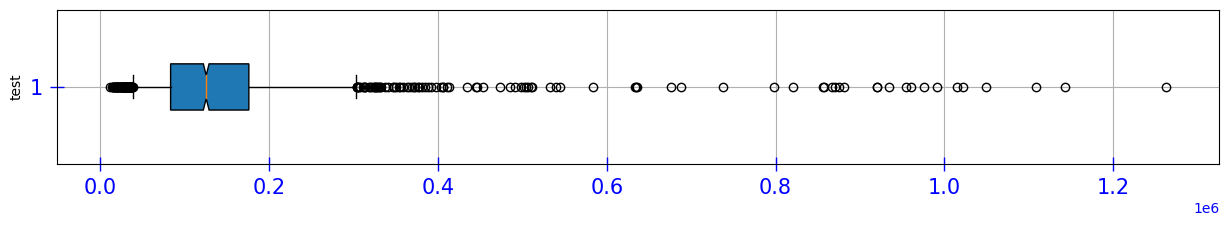

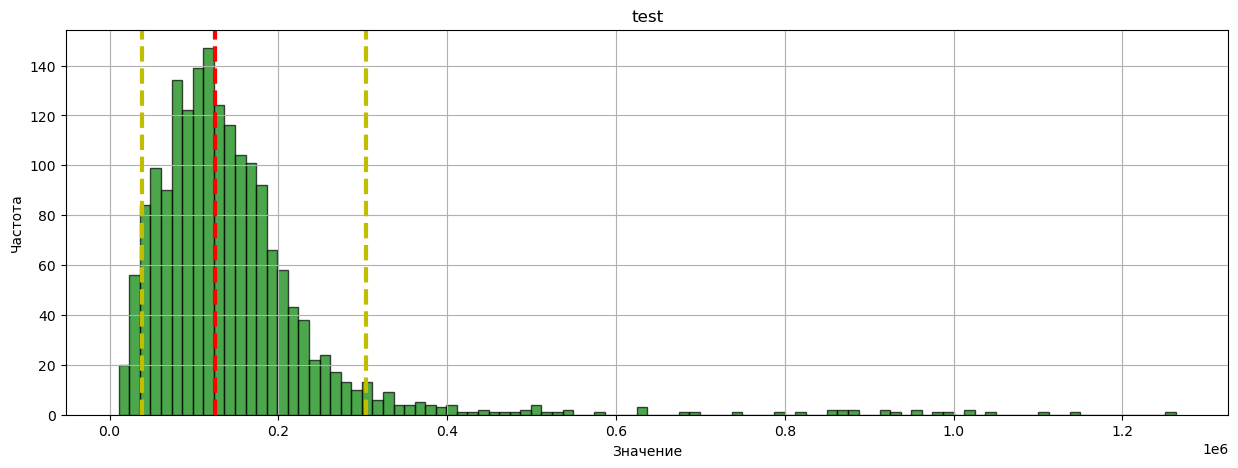

Среднее значение: 147950


In [50]:
plt.figure(figsize =(15, 2))
plt.boxplot(
            est_salary_churn,
            notch=True,
            widths = 0.3,
            whis=(5,95),          #Края "усов" (5 и 95 %)
            sym="o",
            vert=False,
            patch_artist=True,
            manage_ticks=True,
            meanline=True
)
plt.ylabel('test')
plt.tick_params(axis = 'both',  # Применяем параметры к обеим осям
                which = 'major',    # Применяем параметры к основным делениям
                direction = 'inout',# Рисуем деления внутри и снаружи графика
                length = 10,        # Длинна делений
                width = 1,          # Ширина делений
                color = 'b',        # Цвет делений
                pad = 5,            # Расстояние между черточкой и ее подписью
                labelsize = 15,     # Размер подписи
                labelcolor = 'b'    # Цвет подписи
)
plt.grid()
plt.show()

plt.figure(figsize =(15, 5))
est_salary_churn.plot(
                kind='hist', 
                bins=100, 
                alpha=0.7, #прозрачность
                ec='black', #цвет линий
                color='green',
)
plt.title('test')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()

#Вспомогательные линии:

plt.axvline(est_salary_churn.median(),
        linewidth=3, 
        color='red', 
        linestyle='--')
plt.axvline(x=est_salary_churn.quantile(.05),
        linewidth=3, 
        color='y', 
        linestyle='--')
plt.axvline(x=est_salary_churn.quantile(.95),
        linewidth=3, 
        color='y', 
        linestyle='--')
plt.show()
print('Среднее значение: {}'.format(round(est_salary_churn.mean())))

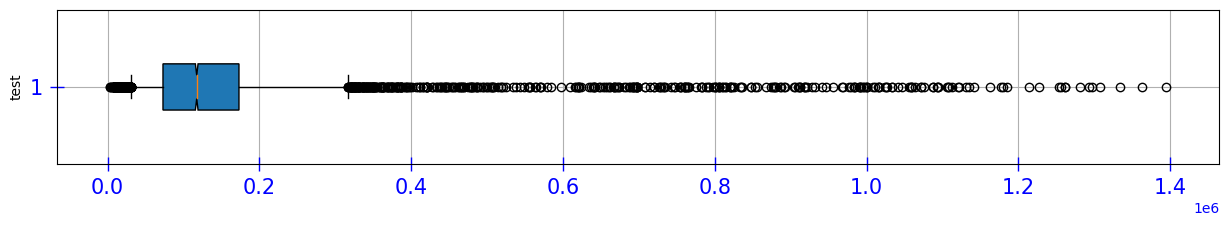

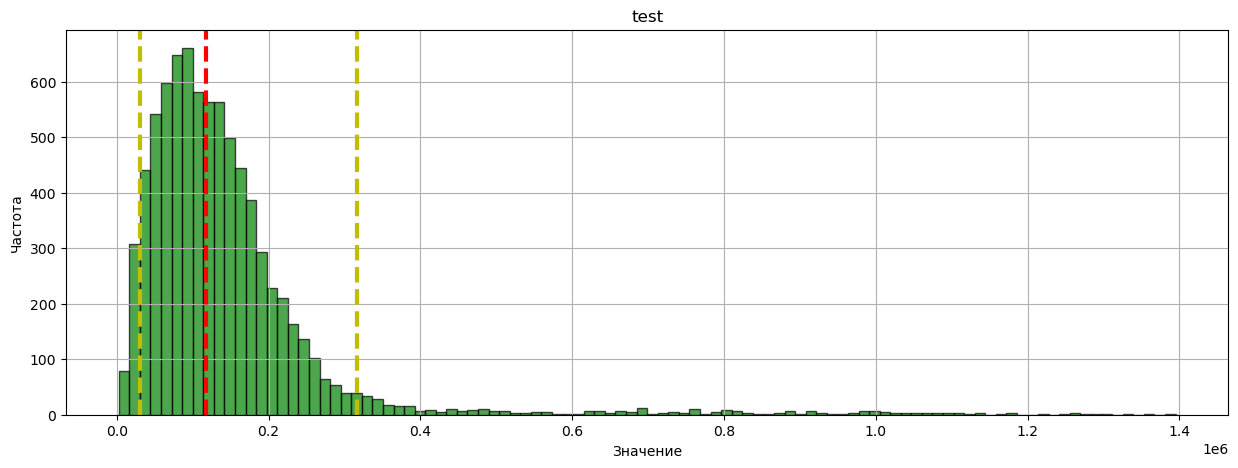

Среднее значение: 146517


In [51]:
plt.figure(figsize =(15, 2))
plt.boxplot(
            est_salary_not_churn,
            notch=True,
            widths = 0.3,
            whis=(5,95),          #Края "усов" (5 и 95 %)
            sym="o",
            vert=False,
            patch_artist=True,
            manage_ticks=True,
            meanline=True
)
plt.ylabel('test')
plt.tick_params(axis = 'both',  # Применяем параметры к обеим осям
                which = 'major',    # Применяем параметры к основным делениям
                direction = 'inout',# Рисуем деления внутри и снаружи графика
                length = 10,        # Длинна делений
                width = 1,          # Ширина делений
                color = 'b',        # Цвет делений
                pad = 5,            # Расстояние между черточкой и ее подписью
                labelsize = 15,     # Размер подписи
                labelcolor = 'b'    # Цвет подписи
)
plt.grid()
plt.show()

plt.figure(figsize =(15, 5))
est_salary_not_churn.plot(
                kind='hist', 
                bins=100, 
                alpha=0.7, #прозрачность
                ec='black', #цвет линий
                color='green',
)
plt.title('test')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()

#Вспомогательные линии:

plt.axvline(est_salary_not_churn.median(),
        linewidth=3, 
        color='red', 
        linestyle='--')
plt.axvline(x=est_salary_not_churn.quantile(.05),
        linewidth=3, 
        color='y', 
        linestyle='--')
plt.axvline(x=est_salary_not_churn.quantile(.95),
        linewidth=3, 
        color='y', 
        linestyle='--')
plt.show()
print('Среднее значение: {}'.format(round(est_salary_not_churn.mean())))

Судя по гистограммам, тип распределения не является нормальным. Проверим на "нормальность" распределения с помощью теста Шапиро-Уилка:

In [52]:
from scipy.stats import shapiro

stat, p = shapiro(est_salary_churn)
print(f'Статистика: {stat}, p-значение: {p}')
if p > 0.05:
    print('Данные распределены нормально')
else:
    print('Данные не распределены нормально')


Статистика: 0.6480976939201355, p-значение: 0.0
Данные не распределены нормально


Для выбора критерия также нужно учитывать различие дисперсий.

In [53]:
from scipy.stats import levene

stat, p = levene(est_salary_churn, est_salary_not_churn)
print(f'Статистика: {stat}, p-значение: {p}')
if p > 0.05:
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

Статистика: 6.207433247254272, p-значение: 0.012737820849999262
Дисперсии не равны


На первый взгляд данные распределены более менее нормально, однако тест на нормальность данные не проходят. Дисперсии у двух групп (клиенты в оттоке и нет) равны.

Для текущей гипотезы буду применять тесты для опредения равенства двух средних:
- t-test Стьюдента
    - Параметрический тест, который показывает максимальную эффективность в случае, если распределение является нормальным, в случае, если оно не нормальное, но достаточно большое данный тест также применим. Дисперсии двух выборок должны быть равны. Так же дву выборки должны быть независимы друг от друга.
- Тест Манна-Уитни
    - наиболее универсальный тест, который не требует нормальности распределения, а также равенства дисперсий. Заменяет значения на ранги и далее сравнивает их средние.

### T-test Стьюдента:
Сформулируем гипотезу на основании средних значений:
- `Нулевая` (H0): Средние доходы клиентов в оттоке и не в оттоке не имеют статистически значимых различий.
- `Альтернативная` (H1): Средние доходы клиентов в оттоке и не в оттоке имеют статистически значимые различия.

In [54]:
import numpy as np
from scipy import stats as st

#находим средний доход клиентов в оттоке
display('Средний доход клиентов в оттоке: {}'\
        .format(round(np.mean(est_salary_churn))))
display('Средний доход клиентов не в оттоке: {}'\
        .format(round(np.mean(est_salary_not_churn))))
#задаем уровень статистической значимости
alpha=0.05
#проводим t-тест для двух независимых выборок
result=st.ttest_ind(
    est_salary_churn.tolist(),
    est_salary_not_churn.tolist(),
    equal_var=False,
    #альтернативная гипотеза о том, что есть статистически значимая разница между группами клиентов
    alternative='two-sided') 
display(f'p-value:{result.pvalue}')

if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

'Средний доход клиентов в оттоке: 147950'

'Средний доход клиентов не в оттоке: 146517'

'p-value:0.6601787299510902'

Не получилось отвергнуть нулевую гипотезу


### Тест Манна-Уитни

In [55]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(est_salary_churn, est_salary_not_churn, alternative='two-sided')

print(f'Mann-Whitney value: {stat}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print("Различие значимо (отвергаем нулевую гипотезу)")
else:
    print("Различие незначимо (не отвергаем нулевую гипотезу)")

Mann-Whitney value: 7745405.0
p-value: 4.145565464796865e-05
Различие значимо (отвергаем нулевую гипотезу)


Вывод:
Тесты показали разные результаты. В данном случае доверять стоит тесту `Манна-Уитни.` `Т-тест` требует нормального распределения и примерного равенства дисперсий, а тест `Манна-Уитни` основан на ранговом распределении данных, поэтому он не требует нормальности распределения или гомогенности дисперсий. Это делает его более устойчивым к нарушениям этих условий.
- Гипотеза о том, что средние доходы клиентов в разрезе оттока имеют значимые статистические различия - более вероятна. Средний доход различается. (со статической сначимостью 0.05).

### Проверить гипотезу "Есть ли статистически значимое различие баланса между теми клиентами, которые ушли и теми, которые остались".

In [56]:
est_balance_churn=data_f.loc[(data_f['churn']==1)&(data_f['balance_null']==0)]['balance']
est_balance_not_churn=data_f.loc[(data_f['churn']==0)&(data_f['balance_null']==0)]['balance']

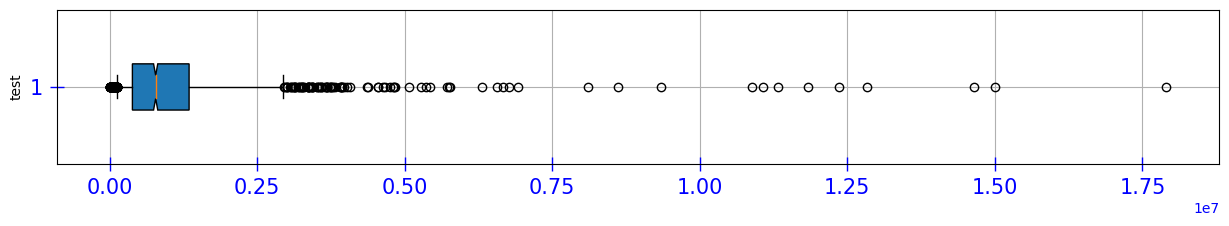

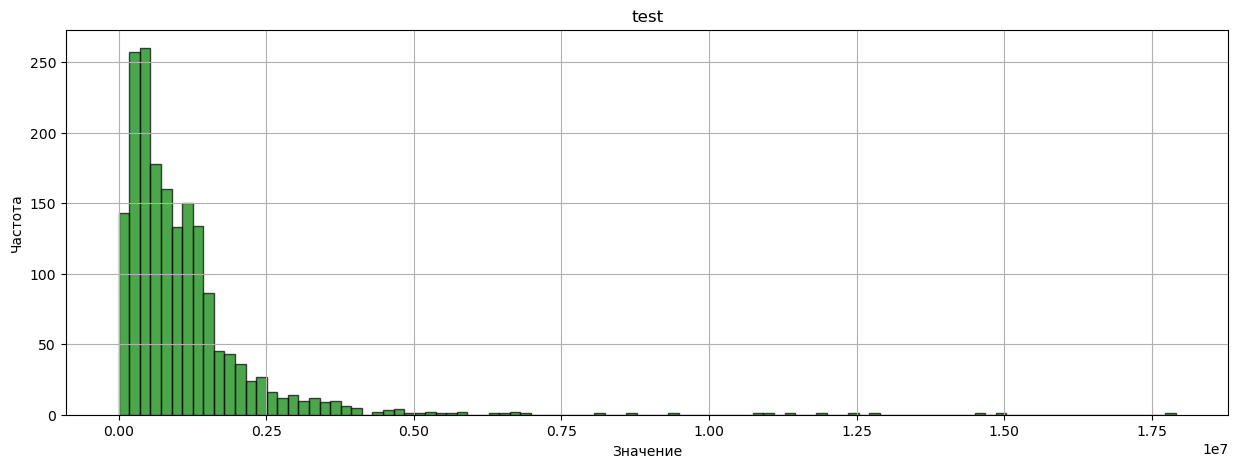

Среднее значение: 1088170


In [57]:
plt.figure(figsize =(15, 2))
plt.boxplot(
            est_balance_churn,
            notch=True,
            widths = 0.3,
            whis=(5,95),          #Края "усов" (5 и 95 %)
            sym="o",
            vert=False,
            patch_artist=True,
            manage_ticks=True,
            meanline=True
)
plt.ylabel('test')
plt.tick_params(axis = 'both',  # Применяем параметры к обеим осям
                which = 'major',    # Применяем параметры к основным делениям
                direction = 'inout',# Рисуем деления внутри и снаружи графика
                length = 10,        # Длинна делений
                width = 1,          # Ширина делений
                color = 'b',        # Цвет делений
                pad = 5,            # Расстояние между черточкой и ее подписью
                labelsize = 15,     # Размер подписи
                labelcolor = 'b'    # Цвет подписи
)
plt.grid()
plt.show()

plt.figure(figsize =(15, 5))
est_balance_churn.plot(
                kind='hist', 
                bins=100, 
                alpha=0.7, #прозрачность
                ec='black', #цвет линий
                color='green',
)
plt.title('test')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()


plt.show()
print('Среднее значение: {}'.format(round(est_balance_churn.mean())))

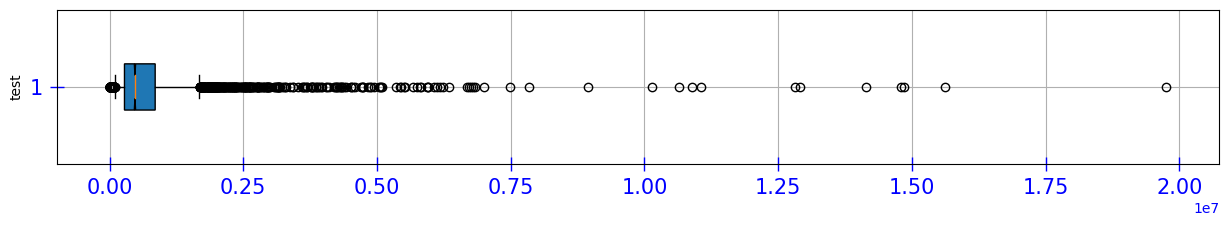

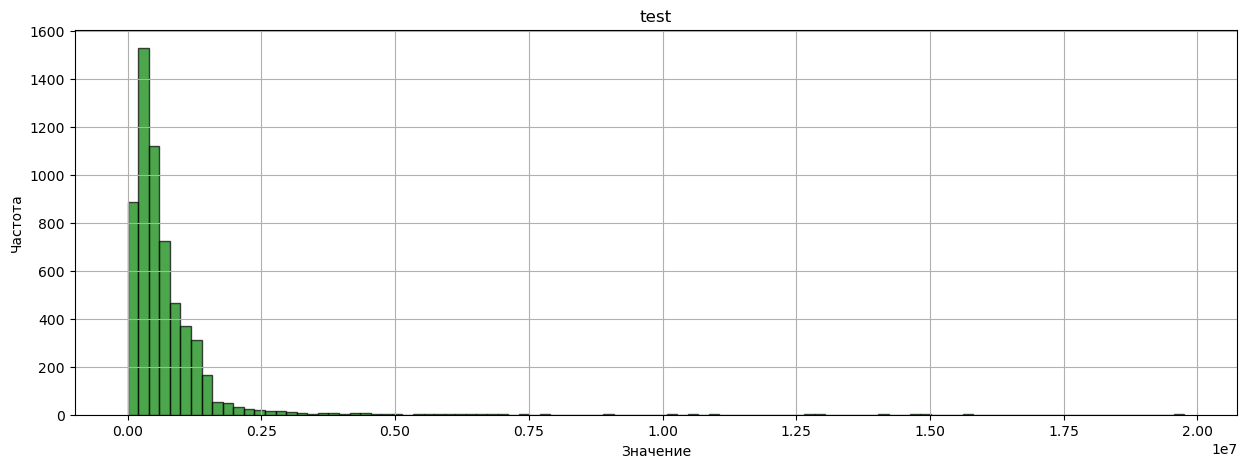

Среднее значение: 693091


In [58]:
plt.figure(figsize =(15, 2))
plt.boxplot(
            est_balance_not_churn,
            notch=True,
            widths = 0.3,
            whis=(5,95),          #Края "усов" (5 и 95 %)
            sym="o",
            vert=False,
            patch_artist=True,
            manage_ticks=True,
            meanline=True
)
plt.ylabel('test')
plt.tick_params(axis = 'both',  # Применяем параметры к обеим осям
                which = 'major',    # Применяем параметры к основным делениям
                direction = 'inout',# Рисуем деления внутри и снаружи графика
                length = 10,        # Длинна делений
                width = 1,          # Ширина делений
                color = 'b',        # Цвет делений
                pad = 5,            # Расстояние между черточкой и ее подписью
                labelsize = 15,     # Размер подписи
                labelcolor = 'b'    # Цвет подписи
)
plt.grid()
plt.show()

plt.figure(figsize =(15, 5))
est_balance_not_churn.plot(
                kind='hist', 
                bins=100, 
                alpha=0.7, #прозрачность
                ec='black', #цвет линий
                color='green',
)
plt.title('test')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()
plt.show()
print('Среднее значение: {}'.format(round(est_balance_not_churn.mean())))

Судя по гистограммам, тип распределения не является нормальным. Проверим на "нормальность" распределения с помощью теста Шапиро-Уилка:

In [59]:
from scipy.stats import shapiro

stat, p = shapiro(est_balance_churn)
print(f'Статистика: {stat}, p-значение: {p}')
if p > 0.05:
    print('Данные распределены нормально')
else:
    print('Данные не распределены нормально')


Статистика: 0.5864161252975464, p-значение: 0.0
Данные не распределены нормально


Для выбора критерия также нужно учитывать различие дисперсий.

In [60]:
from scipy.stats import levene

stat, p = levene(est_balance_churn, est_balance_not_churn)
print(f'Статистика: {stat}, p-значение: {p}')
if p > 0.05:
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

Статистика: 118.13714709393119, p-значение: 2.5552989353494265e-27
Дисперсии не равны


Распределение не является нормальным, дисперсии не равны. Отлично подойдет тест Манна-Уитни.

### Тест Манна-Уитни:
Сформулируем гипотезу на основании средних значений:
- `Нулевая` (H0): Средний баланс клиентов в оттоке и не в оттоке не имеют статистически значимых различий.
- `Альтернативная` (H1): Средние балансы клиентов в оттоке и не в оттоке имеют статистически значимые различия.

In [61]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(est_balance_churn, est_balance_not_churn, alternative='two-sided')

print(f'Mann-Whitney value: {stat}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print("Различие значимо (отвергаем нулевую гипотезу)")
else:
    print("Различие незначимо (не отвергаем нулевую гипотезу)")

Mann-Whitney value: 6772626.0
p-value: 1.2723249448955427e-70
Различие значимо (отвергаем нулевую гипотезу)


Вывод:
- Альтернативная гипотеза о том, что средние балансы клиентов в разрезе оттока имеют значимые статистические различия - более вероятна. Средний доход различается. (со статической сначимостью 0.05).

## Общий вывод исследовательского анализа:
- Доля оттока по всему банку: `18 %`

В ходе анализа я обнаружил важные области на которые стоит обратить внимание:
- `Возраст`. Сравнение средних значений возраста клиентов в разрезе оттока клиентов и корреляционный анализ результатов не дал. Однако, сравнив 2 нормализованных гистограммы распределения возрастов в разрезе по оттоку мною были обнаружены вспышки, то есть диапазоны возрастов, при которых отток клиента наиболее вероятен: 
    - **с 25 до 34 лет**
    - **с 50 до 60 лет**
    
- `Пол`. **Среди мужчин повышенный отток**, в отличии от женщин, используем это в сигментации клиентов.

- `Баллы собственности`. Сравнив доли оттока по каждому баллу я пришел к выводу, что **с ростом баллов собственности - отток уверенно растет.** Это может быть связано с невыгодными условиями кредитования под залог недвижимости. Также сравнение средних значений в разрезе оттока показало, **у отточных клиентов средний балл собственности выше на 44%.**

- `Количество продуктов`. **С ростом количества продуктов отток также растет.** **Пик приходится на 4 продукта - отток 60%.** Довольно много. Возможно, клиентов отпугивают невыгодные условия продуктов (кредитование и вклады). Сравнение средних также показало, что **у клиентов в оттоке на 30% больше продуктов.**

- `Кредитный скорринг`. В исследовательском анализе очень хорошо просматривается, что когда кредитный скорринг клиента достигает 850, что значит, что его доходы растут, клиент с большей вероятностью, попадает в отток. Область оттока:
    - **850 - 950 баллов**

- `Наличие кредитной карты`. Здесь ситуация зеркальная, **клиенты с кредитной картой попадают в отток реже на 25%.** Скорее всего это менее состоятельные люди и отток точно не связан с условиями кредитной политики.

- `Активные клиенты`. **Активные клиенты оказываются в оттоке чаще на 37%.** Возможно, неактивные клиенты перестали пользоваться услугами не уведомив банк о каких либо недостатках в продуктах.
    
- `Доход клиента`. По средним значениям зацепок не обнаружилось также как и в корреляционном анализе. Средние значения доходов пользователей в оттоке и нет различаются всего лишь на 1%. Однако, сравнив нормализованные гистограммы зарплат в разрезе оттока хорошо видно, что **чем больше доход у клиента, тем выше вероятность того, что он окажется в оттоке.** **Резко повышается вероятность оттока клиентов, если его доход превышает 100к в месяц.**
  - **Дополнительно была проведена проверка гипотезы, о том, что средние доходы клиентов в разрезе оттока различаются. Тест Манна-Уитни показал, что статистически-значимые различия есть.**

- `Баланс на счету`. При сравнении средних значений баланса клиентов в разрезе оттока самая большая разница. **Баланс у отточных клиентов в среднем на 71% больше баланса лояльных.** В сравнении гистограмм видим, что чем состоятельнее клиент тем выше вероятность того, что он окажется в оттоке. **Резко повышается вероятность оттока клиентов, если на его балансе больше 1 млн рублей.**
    - **Дополнительно была проведена проверка гипотезы, о том, что средний баланс на счету клиентов в разрезе оттока различаются. Тест Манна-Уитни показал, что статистически-значимые различия есть.**

По итогу, в отток попадают клиенты у которых появляются дополнительные активы (недвижимость,крупные счета). Скорее всего у этих же клиентов в целом растут доходы (растет кредитный скорринг) и условия банка не подходят для них. Хранить активы в этом банке, вероятнее всего невыгодно.


## Шаг 5. Провести сегментацию клиентов
Вручую вывести компактные сегменты клиентов и приотизировать их.
Вывести размер сегментов и уровень оттока по ним.

Для начала напишу функцию, которая поможет вычислить отточные сегменты.

In [62]:
def clusters(param1='user_id', param2='user_id', param3='user_id',
             th11=None, th12=None, th21=None, th22=None, th31=None, th32=None):
    #задаю значения по умолчанию
    if th11 is None:
        th11 = data_f[param1].min()
    if th12 is None:
        th12 = data_f[param1].max()
    if th21 is None:
        th21 = data_f[param2].min()
    if th22 is None:
        th22 = data_f[param2].max()
    if th31 is None:
        th31 = data_f[param3].min()
    if th32 is None:
        th32 = data_f[param3].max()
    churn_rate=round(data_f.query(
            f'{param1}>={th11} and {param1}<={th12} and \
            {param2}>={th21} and {param2}<={th22} and \
            {param3}>={th31} and {param3}<={th32}')['churn'].mean(),2)
    segment_shape=data_f.query(
        f'{param1}>={th11} and {param1}<={th12} and \
        {param2}>={th21} and {param2}<={th22} and \
        {param3}>={th31} and {param3}<={th32}')['churn'].shape
    return print(f'Размер сегмента: {segment_shape[0]} клиентов, \nПроцент отточных клиентов: {round(churn_rate*100)}%')

Описание функции:
`param1` - первый(и т.д) параметр по которому мы фильтруем сегмент
`th11` - нижняя граница параметра (включительно). По умолчинию - минимальное значение.
`th12` - верхняя граница параметра (включительно). По умолчинию - максимальное значение.

В данной функции максимум 3 параметра (условия проекта). По умолчанию (в случае если один из параметров не задан) фильтр работает "в холостую". Задается параметр `user_id` от минимума до максимума.

1 сегмент. 
- Клиенты в возрасте от 25 до 34 лет, 
- с балансом на счету от 600000 до 3000000, 
- со средней зарплатой от 100000 до 200000

In [63]:
clusters(
    param1='age', 
    param2='balance',
    param3='est_salary',
    th11=25, 
    th12=34, 
    th21=600000, 
    th22=3000000,
    th31=100000,
    th32=200000
)

Размер сегмента: 326 клиентов, 
Процент отточных клиентов: 56%


2 сегмент. 
- Клиенты в возрасте от 50 до 59 лет, 
- с балансом на счету от 700000 до 3000000, 
- с кредитным скоррингом от 800 до 960

In [64]:
clusters(
    param1='age', 
    param2='balance',
    param3='score',
    th11=50, 
    th12=59, 
    th21=700000, 
    th22=3000000,
    th31=800,
    th32=960
)

Размер сегмента: 438 клиентов, 
Процент отточных клиентов: 49%


3 сегмент. 
- Клиенты мужского пола, 
- с балансом на счету от 900000 до 4000000, 
- с кредитным скоррингом от 860 до 940

In [65]:
clusters(
    param1='gender', 
    param2='balance',
    param3='score',
    th11=1, 
    th12=1, 
    th21=900000, 
    th22=4000000,
    th31=860,
    th32=940
)

Размер сегмента: 598 клиентов, 
Процент отточных клиентов: 60%


4 сегмент. 
- Клиенты с количеством баллов собственности от 4, 
- Клиенты - активные, 
- Средняя зарплата клиентов от 100000 до 300000

In [66]:
clusters(
    param1='equity', 
    param2='last_activity',
    param3='est_salary',
    th11=4,  
    th21=1, 
    th22=1,
    th31=100000,
    th32=300000
)

Размер сегмента: 1088 клиентов, 
Процент отточных клиентов: 49%


Приоритезация сегментов
1. 3 сегмент. Немалое количество клиентов (598) с высоким процентом оттока (60%).
2. 4 сегмент. Большое количество клиентов (1089) с хорошим процентом оттока (49%).
3. 1 сегмент. Небольшая группа (326) с хоршим проценитом оттока (56%).
4. 2 сегмент. Средяя группа (438) с хорошим оттоком (49%)

## Общий вывод

### Для качественного проведения анализа в разделе предобработки были выполнены корректирующие действия:
- были приведены в порядок названия столбцов
- обработаны пропуски (пропуски оказались неслучайными, но принято решение заполнить их заглушками). В ходе обработки пропусков потеря данных незначительная - 1,41%
- обработаны дубликаты (были продублированы некоторые номера клиентов, скорее всего техническая ошибка)
- категориальные столбцы c полом и городом  клиентов были преобразованы в бинарные данные

### В исследовательском анализе был получен результат:
- Отток по городам примерно одинаковый, в пределах 15-20%
- Среди мужчин повышенный отток, в отличии от женщин, используем это в сигментации клиентов.
- С ростом баллов собственности - отток уверенно растет. Это может быть связано с невыгодными условиями кредитования под залог недвижимости.
- С ростом количества продуктов отток также растет. Пик призодится на 4 продукта - отток 60%. Довольно много. Возможно, клиентов отпугивают невыгодные условия продуктов (кредитование и вклады).
- Отток среди клиентов с кредитной картой ниже, скорее всего по кредитным картам условия приемлемые.
- Отток среди активных клиентов выше. (возможно, неактивные клиенты перестали пользоваться услугами не уведомив банк о каких либо недостатках в продуктах).
- Баланс. Баланс у отточных клиентов в среднем на 71% больше баланса лояльных.
- Баллы собственности. У отточных клиентов средний балл собственности выше на 44%
- Активные клиенты чаще в оттоке на 37%
- У клиентов в оттоке на 30% больше продуктов
- А кредитных карт у клиентов в оттоке меньше на 25%.

### Интерпретация результатов исследовательского анализа:
- Доля оттока по всему банку: `18 %`

В ходе анализа я обнаружил важные области на которые стоит обратить внимание:
- `Возраст`. Сравнение средних значений возраста клиентов в разрезе оттока клиентов и корреляционный анализ результатов не дал. Однако, сравнив 2 нормализованных гистограммы распределения возрастов в разрезе по оттоку мною были обнаружены вспышки, то есть диапазоны возрастов, при которых отток клиента наиболее вероятен: 
    - **с 25 до 34 лет**
    - **с 50 до 60 лет**
    
- `Пол`. **Среди мужчин повышенный отток**, в отличии от женщин, используем это в сигментации клиентов.

- `Баллы собственности`. Сравнив доли оттока по каждому баллу я пришел к выводу, что **с ростом баллов собственности - отток уверенно растет.** Это может быть связано с невыгодными условиями кредитования под залог недвижимости. Также сравнение средних значений в разрезе оттока показало, **у отточных клиентов средний балл собственности выше на 44%.**

- `Количество продуктов`. **С ростом количества продуктов отток также растет.** **Пик приходится на 4 продукта - отток 60%.** Довольно много. Возможно, клиентов отпугивают невыгодные условия продуктов (кредитование и вклады). Сравнение средних также показало, что **у клиентов в оттоке на 30% больше продуктов.**

- `Кредитный скорринг`. В исследовательском анализе очень хорошо просматривается, что когда кредитный скорринг клиента достигает 850, что значит, что его доходы растут, клиент с большей вероятностью, попадает в отток. Область оттока:
    - **850 - 950 баллов**

- `Наличие кредитной карты`. Здесь ситуация зеркальная, **клиенты с кредитной картой попадают в отток реже на 25%.** Скорее всего это менее состоятельные люди и отток точно не связан с условиями кредитной политики.

- `Активные клиенты`. **Активные клиенты оказываются в оттоке чаще на 37%.** Возможно, неактивные клиенты перестали пользоваться услугами не уведомив банк о каких либо недостатках в продуктах.
    
- `Доход клиента`. По средним значениям зацепок не обнаружилось также как и в корреляционном анализе. Средние значения доходов пользователей в оттоке и нет различаются всего лишь на 1%. Однако, сравнив нормализованные гистограммы зарплат в разрезе оттока хорошо видно, что **чем больше доход у клиента, тем выше вероятность того, что он окажется в оттоке.** **Резко повышается вероятность оттока клиентов, если его доход превышает 100к в месяц.**
  - **Дополнительно была проведена проверка гипотезы, о том, что средние доходы клиентов в разрезе оттока различаются. Тест Манна-Уитни показал, что статистически-значимые различия есть.**

- `Баланс на счету`. При сравнении средних значений баланса клиентов в разрезе оттока самая большая разница. **Баланс у отточных клиентов в среднем на 71% больше баланса лояльных.** В сравнении гистограмм видим, что чем состоятельнее клиент тем выше вероятность того, что он окажется в оттоке. **Резко повышается вероятность оттока клиентов, если на его балансе больше 1 млн рублей.**
    - **Дополнительно была проведена проверка гипотезы, о том, что средний баланс на счету клиентов в разрезе оттока различаются. Тест Манна-Уитни показал, что статистически-значимые различия есть.**
    
### Сегментация клиентов по приоритетам (с рекоментациями):
1. 3 сегмент. Немалое количество клиентов (598) с высоким процентом оттока (60%). Рекомендуется предложить отточным клиента более выгодные способы инвестирования. Клиенты скорее всего находят более выгодные предложения по вкладам.
    - Клиенты мужского пола, 
    - с балансом на счету от 900000 до 4000000, 
    - с кредитным скоррингом от 860 до 940
2. 4 сегмент. Большое количество клиентов (1089) с хорошим процентом оттока (49%). Рекомендуется предложить выгодные условия страхования недвижимости для данных клиентов, либо скорректировать условия по ипотечным кредитам.
    - Клиенты с количеством баллов собственности от 4, 
    - Клиенты - активные, 
    - Средняя зарплата клиентов от 100000 до 300000
3. 1 сегмент. Небольшая группа (326) с хоршим проценитом оттока (56%). Рекомендуется рассмотреть предложения для молодежи, например повышенный процент на остаток на счету, либо сократить комиссию за обслуживание "молодежных карт".
    - Клиенты в возрасте от 25 до 34 лет, 
    - с балансом на счету от 600000 до 3000000, 
    - со средней зарплатой от 100000 до 200000
4. 2 сегмент. Средяя группа (438) с хорошим оттоком (49%). Рекомендация ввести для данного сегмента особые ставки по вкладам и беспроцентные кредитные карты, так как скорринг неплох.
    - Клиенты в возрасте от 50 до 59 лет, 
    - с балансом на счету от 700000 до 3000000, 
    - с кредитным скоррингом от 800 до 960

По итогу, в отток попадают клиенты у которых появляются дополнительные активы (недвижимость,крупные счета). Скорее всего у этих же клиентов в целом растут доходы (растет кредитный скорринг) и условия банка не подходят для них. Хранить активы в этом банке, вероятнее всего невыгодно.
